# 逻辑回归实战01
根据学生两门课的成绩，判断学生是否能通过测试

In [1]:
import pandas as pd

In [2]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('data/ex2data1.txt',header=None)
df.columns=['class1','class2','pass']

In [51]:
df.head()

,class1,class2,pass,predict
0,34.623660,78.024693,0,1
1,30.286711,43.894998,0,1
2,35.847409,72.902198,0,1
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1


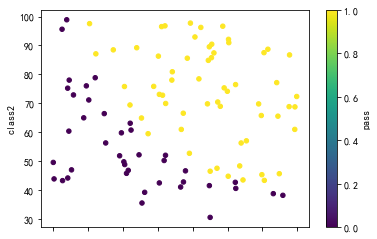

In [5]:
df.plot(kind='scatter',x='class1',y='class2',c='pass',cmap='viridis')

In [53]:
import tensorflow as tf

In [ ]:
tf.compat.v1.losses.sigmoid_cross_entropy()

In [ ]:
tf.nn.sigmoid_cross_entropy_with_logits()

In [ ]:
tf.losses.binary_crossentropy()

In [64]:
x = df[['class1','class2']].values
y = df[['pass']].values

model = tf.keras.Sequential([tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])
model.compile(optimizer='adam',
              loss=tf.losses.binary_crossentropy,
              metrics=[tf.metrics.binary_accuracy])
model.fit(x,y,epochs=10000,verbose=0)

(30, 100)

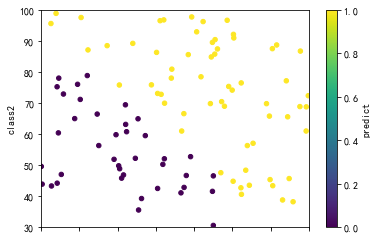

In [60]:
df['predict']=model.predict_classes(x)
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')
plt.contour(X,Y,Z.reshape([101,101]),0.5)
plt.xlim(30,100)
plt.ylim(30,100)

In [61]:
df.head()

,class1,class2,pass,predict
0,34.623660,78.024693,0,0
1,30.286711,43.894998,0,0
2,35.847409,72.902198,0,0
3,60.182599,86.308552,1,1
4,79.032736,75.344376,1,1


分割线是WX+b=0，也就是0.20623253*class1+0.20147243*class2-25.16144=0，这条直线就是分割线，分割了两类考生

# 逻辑回归实战02
此任务基于ex2data2.txt数据集的代码实现，ex2data2.txt数据集与ex2data1.txt数据集的格式基本一致，代码实现的流程上一致，不同处是特征提取和边界函数的图像绘制上。
在ex2data1.txt数据集中边界函数是一个一元一次函数，因此，基于ex2data1.txt数据集画边界函数非常简单。而在ex2data2.txt数据集中我们要预设的边界函数是一个高阶函数，因此再使用上面的代码不能绘制出高阶函数的曲线，此外，在此案例中，两个特征不能满足边界函数的要求，需要通过数据集中的数据计算出多个新的特征，以满足边界函数的要求。这是此案例中要解决的两个难点。

In [62]:
df = pd.read_csv('data/ex2data2.txt',header=None)
df.columns=['class1','class2','pass']

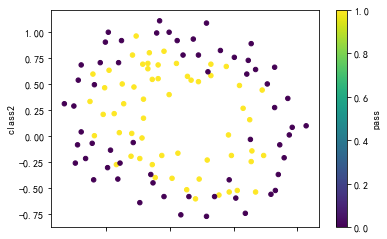

In [63]:
df.plot(kind='scatter',x='class1',y='class2',c='pass',cmap='viridis')

In [65]:
x = df[['class1','class2']].values
y = df[['pass']].values

model = tf.keras.Sequential([tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])
model.compile(optimizer='adam',
              loss=tf.losses.binary_crossentropy,
              metrics=[tf.metrics.binary_accuracy])
model.fit(x,y,epochs=10000,verbose=0)

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(-1, 1)

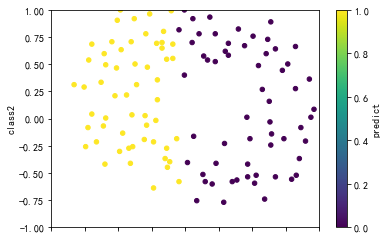

In [66]:
df['predict']=model.predict_classes(x)
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')
plt.contour(X,Y,Z.reshape([101,101]),0)
plt.xlim(-1,1)
plt.ylim(-1,1)

In [77]:
x = df[['class1','class2']].values
y = df[['pass']].values

model = tf.keras.Sequential([tf.keras.layers.Dense(3,activation=tf.nn.sigmoid),
                            tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])
model.compile(optimizer='adam',
              loss=tf.losses.binary_crossentropy,
              metrics=[tf.metrics.binary_accuracy])
model.fit(x,y,epochs=10000,verbose=0)

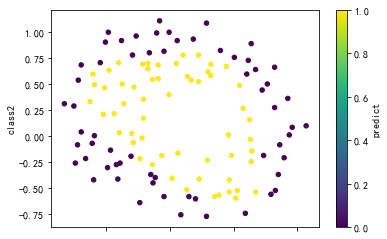

In [78]:
df['predict']=model.predict_classes(x)
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')

In [79]:
df['p_label']=df['predict'].apply(lambda x:0 if x<0.5 else 1)

In [80]:
print('错误率：',(df['pass'] != df['p_label']).sum()/len(df))

错误率： 0.17796610169491525


## 过拟合问题

多层的神经网络可以更好的学习到数据集中的信息，但过于复杂的神经网络却又将带来另一个问题：过于强大的学习能力将导致神经网络学习到仅仅属于训练数据的特征。

过拟合的检测：我们可以将训练数据人工的分成两部分，一部分用作训练，另一部分用于检测训练的效果，神经网络将不会学习到用于检测的数据的信息，这样，就可以相对有效的发现过拟合问题。

过拟合的预防：如果存在过拟合问题，就需要进行应对。
**一是简化神经网络的结构，去除多余的神经元或是神经网络层（如上面，最合适的网络层数是2层）**
**二是控制训练步数**
**三是加入正则化项**

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test,y_train,y_test = train_test_split(df[['class1','class2']].values,df[['pass']].values,test_size=0.3)

### 选择合适的网络结构

In [85]:
model = tf.keras.Sequential([tf.keras.layers.Dense(3,activation=tf.nn.sigmoid),
                            tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])
model.compile(optimizer='adam',
              loss=tf.losses.binary_crossentropy,
              metrics=[tf.metrics.binary_accuracy])
model.fit(x_train,y_train,epochs=10000,verbose=2,validation_data=[x_test,y_test])

Train on 82 samples, validate on 36 samples
Epoch 1/10000
82/82 - 0s - loss: 0.7209 - binary_accuracy: 0.5244 - val_loss: 0.7889 - val_binary_accuracy: 0.4167
Epoch 2/10000
82/82 - 0s - loss: 0.7199 - binary_accuracy: 0.5244 - val_loss: 0.7873 - val_binary_accuracy: 0.4167
Epoch 3/10000
82/82 - 0s - loss: 0.7191 - binary_accuracy: 0.5244 - val_loss: 0.7857 - val_binary_accuracy: 0.4167
Epoch 4/10000
82/82 - 0s - loss: 0.7183 - binary_accuracy: 0.5244 - val_loss: 0.7841 - val_binary_accuracy: 0.4167
Epoch 5/10000
82/82 - 0s - loss: 0.7174 - binary_accuracy: 0.5244 - val_loss: 0.7827 - val_binary_accuracy: 0.4167
Epoch 6/10000
82/82 - 0s - loss: 0.7168 - binary_accuracy: 0.5244 - val_loss: 0.7813 - val_binary_accuracy: 0.4167
Epoch 7/10000
82/82 - 0s - loss: 0.7161 - binary_accuracy: 0.5244 - val_loss: 0.7799 - val_binary_accuracy: 0.4167
Epoch 8/10000
82/82 - 0s - loss: 0.7153 - binary_accuracy: 0.5244 - val_loss: 0.7785 - val_binary_accuracy: 0.4167
Epoch 9/10000
82/82 - 0s - loss: 0.7

Epoch 72/10000
82/82 - 0s - loss: 0.6937 - binary_accuracy: 0.5244 - val_loss: 0.7257 - val_binary_accuracy: 0.4167
Epoch 73/10000
82/82 - 0s - loss: 0.6937 - binary_accuracy: 0.5244 - val_loss: 0.7252 - val_binary_accuracy: 0.4167
Epoch 74/10000
82/82 - 0s - loss: 0.6934 - binary_accuracy: 0.5244 - val_loss: 0.7248 - val_binary_accuracy: 0.4167
Epoch 75/10000
82/82 - 0s - loss: 0.6933 - binary_accuracy: 0.5244 - val_loss: 0.7243 - val_binary_accuracy: 0.4167
Epoch 76/10000
82/82 - 0s - loss: 0.6932 - binary_accuracy: 0.5244 - val_loss: 0.7238 - val_binary_accuracy: 0.4167
Epoch 77/10000
82/82 - 0s - loss: 0.6931 - binary_accuracy: 0.5244 - val_loss: 0.7234 - val_binary_accuracy: 0.4167
Epoch 78/10000
82/82 - 0s - loss: 0.6931 - binary_accuracy: 0.5244 - val_loss: 0.7230 - val_binary_accuracy: 0.4167
Epoch 79/10000
82/82 - 0s - loss: 0.6930 - binary_accuracy: 0.5244 - val_loss: 0.7227 - val_binary_accuracy: 0.4167
Epoch 80/10000
82/82 - 0s - loss: 0.6929 - binary_accuracy: 0.5244 - val

Epoch 143/10000
82/82 - 0s - loss: 0.6907 - binary_accuracy: 0.5244 - val_loss: 0.7109 - val_binary_accuracy: 0.4167
Epoch 144/10000
82/82 - 0s - loss: 0.6907 - binary_accuracy: 0.5244 - val_loss: 0.7107 - val_binary_accuracy: 0.4167
Epoch 145/10000
82/82 - 0s - loss: 0.6907 - binary_accuracy: 0.5244 - val_loss: 0.7107 - val_binary_accuracy: 0.4167
Epoch 146/10000
82/82 - 0s - loss: 0.6907 - binary_accuracy: 0.5244 - val_loss: 0.7106 - val_binary_accuracy: 0.4167
Epoch 147/10000
82/82 - 0s - loss: 0.6907 - binary_accuracy: 0.5244 - val_loss: 0.7106 - val_binary_accuracy: 0.4167
Epoch 148/10000
82/82 - 0s - loss: 0.6906 - binary_accuracy: 0.5244 - val_loss: 0.7106 - val_binary_accuracy: 0.4167
Epoch 149/10000
82/82 - 0s - loss: 0.6906 - binary_accuracy: 0.5244 - val_loss: 0.7105 - val_binary_accuracy: 0.4167
Epoch 150/10000
82/82 - 0s - loss: 0.6906 - binary_accuracy: 0.5244 - val_loss: 0.7105 - val_binary_accuracy: 0.4167
Epoch 151/10000
82/82 - 0s - loss: 0.6907 - binary_accuracy: 0.5

82/82 - 0s - loss: 0.6902 - binary_accuracy: 0.5244 - val_loss: 0.7089 - val_binary_accuracy: 0.4167
Epoch 214/10000
82/82 - 0s - loss: 0.6902 - binary_accuracy: 0.5244 - val_loss: 0.7088 - val_binary_accuracy: 0.4167
Epoch 215/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 0.7087 - val_binary_accuracy: 0.4167
Epoch 216/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 0.7085 - val_binary_accuracy: 0.4167
Epoch 217/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 0.7084 - val_binary_accuracy: 0.4167
Epoch 218/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 0.7083 - val_binary_accuracy: 0.4167
Epoch 219/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 0.7082 - val_binary_accuracy: 0.4167
Epoch 220/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 0.7082 - val_binary_accuracy: 0.4167
Epoch 221/10000
82/82 - 0s - loss: 0.6901 - binary_accuracy: 0.5244 - val_loss: 

Epoch 284/10000
82/82 - 0s - loss: 0.6898 - binary_accuracy: 0.5244 - val_loss: 0.7076 - val_binary_accuracy: 0.4167
Epoch 285/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5244 - val_loss: 0.7075 - val_binary_accuracy: 0.4167
Epoch 286/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5244 - val_loss: 0.7074 - val_binary_accuracy: 0.4167
Epoch 287/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5244 - val_loss: 0.7073 - val_binary_accuracy: 0.4167
Epoch 288/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5244 - val_loss: 0.7071 - val_binary_accuracy: 0.4167
Epoch 289/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5366 - val_loss: 0.7070 - val_binary_accuracy: 0.4167
Epoch 290/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5366 - val_loss: 0.7069 - val_binary_accuracy: 0.4167
Epoch 291/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5366 - val_loss: 0.7069 - val_binary_accuracy: 0.4167
Epoch 292/10000
82/82 - 0s - loss: 0.6897 - binary_accuracy: 0.5

82/82 - 0s - loss: 0.6894 - binary_accuracy: 0.5488 - val_loss: 0.7068 - val_binary_accuracy: 0.4167
Epoch 355/10000
82/82 - 0s - loss: 0.6894 - binary_accuracy: 0.5488 - val_loss: 0.7068 - val_binary_accuracy: 0.4167
Epoch 356/10000
82/82 - 0s - loss: 0.6894 - binary_accuracy: 0.5488 - val_loss: 0.7068 - val_binary_accuracy: 0.4167
Epoch 357/10000
82/82 - 0s - loss: 0.6893 - binary_accuracy: 0.5488 - val_loss: 0.7067 - val_binary_accuracy: 0.4167
Epoch 358/10000
82/82 - 0s - loss: 0.6893 - binary_accuracy: 0.5488 - val_loss: 0.7066 - val_binary_accuracy: 0.4167
Epoch 359/10000
82/82 - 0s - loss: 0.6893 - binary_accuracy: 0.5488 - val_loss: 0.7066 - val_binary_accuracy: 0.4167
Epoch 360/10000
82/82 - 0s - loss: 0.6893 - binary_accuracy: 0.5488 - val_loss: 0.7066 - val_binary_accuracy: 0.4167
Epoch 361/10000
82/82 - 0s - loss: 0.6893 - binary_accuracy: 0.5488 - val_loss: 0.7066 - val_binary_accuracy: 0.4167
Epoch 362/10000
82/82 - 0s - loss: 0.6893 - binary_accuracy: 0.5488 - val_loss: 

Epoch 425/10000
82/82 - 0s - loss: 0.6890 - binary_accuracy: 0.5976 - val_loss: 0.7072 - val_binary_accuracy: 0.4167
Epoch 426/10000
82/82 - 0s - loss: 0.6890 - binary_accuracy: 0.5976 - val_loss: 0.7072 - val_binary_accuracy: 0.4444
Epoch 427/10000
82/82 - 0s - loss: 0.6890 - binary_accuracy: 0.5976 - val_loss: 0.7072 - val_binary_accuracy: 0.4444
Epoch 428/10000
82/82 - 0s - loss: 0.6890 - binary_accuracy: 0.5976 - val_loss: 0.7071 - val_binary_accuracy: 0.4444
Epoch 429/10000
82/82 - 0s - loss: 0.6890 - binary_accuracy: 0.5976 - val_loss: 0.7072 - val_binary_accuracy: 0.4444
Epoch 430/10000
82/82 - 0s - loss: 0.6889 - binary_accuracy: 0.5976 - val_loss: 0.7071 - val_binary_accuracy: 0.4444
Epoch 431/10000
82/82 - 0s - loss: 0.6889 - binary_accuracy: 0.5976 - val_loss: 0.7071 - val_binary_accuracy: 0.4444
Epoch 432/10000
82/82 - 0s - loss: 0.6889 - binary_accuracy: 0.5976 - val_loss: 0.7070 - val_binary_accuracy: 0.4444
Epoch 433/10000
82/82 - 0s - loss: 0.6889 - binary_accuracy: 0.5

82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 496/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 497/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7078 - val_binary_accuracy: 0.4722
Epoch 498/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 499/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7080 - val_binary_accuracy: 0.4722
Epoch 500/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7081 - val_binary_accuracy: 0.4722
Epoch 501/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 0.7082 - val_binary_accuracy: 0.4444
Epoch 502/10000
82/82 - 0s - loss: 0.6885 - binary_accuracy: 0.5976 - val_loss: 0.7083 - val_binary_accuracy: 0.4444
Epoch 503/10000
82/82 - 0s - loss: 0.6886 - binary_accuracy: 0.5976 - val_loss: 

Epoch 566/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7084 - val_binary_accuracy: 0.4722
Epoch 567/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7084 - val_binary_accuracy: 0.4722
Epoch 568/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7085 - val_binary_accuracy: 0.4722
Epoch 569/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7084 - val_binary_accuracy: 0.4722
Epoch 570/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7084 - val_binary_accuracy: 0.4722
Epoch 571/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7085 - val_binary_accuracy: 0.4722
Epoch 572/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7086 - val_binary_accuracy: 0.4722
Epoch 573/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6220 - val_loss: 0.7086 - val_binary_accuracy: 0.4722
Epoch 574/10000
82/82 - 0s - loss: 0.6882 - binary_accuracy: 0.6

82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.5000
Epoch 637/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7080 - val_binary_accuracy: 0.5000
Epoch 638/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7081 - val_binary_accuracy: 0.5000
Epoch 639/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7083 - val_binary_accuracy: 0.5000
Epoch 640/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7085 - val_binary_accuracy: 0.5000
Epoch 641/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7087 - val_binary_accuracy: 0.5000
Epoch 642/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7088 - val_binary_accuracy: 0.5000
Epoch 643/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 0.7090 - val_binary_accuracy: 0.5000
Epoch 644/10000
82/82 - 0s - loss: 0.6878 - binary_accuracy: 0.6463 - val_loss: 

Epoch 707/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6463 - val_loss: 0.7094 - val_binary_accuracy: 0.5000
Epoch 708/10000
82/82 - 0s - loss: 0.6875 - binary_accuracy: 0.6463 - val_loss: 0.7095 - val_binary_accuracy: 0.5000
Epoch 709/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6463 - val_loss: 0.7093 - val_binary_accuracy: 0.5000
Epoch 710/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6341 - val_loss: 0.7093 - val_binary_accuracy: 0.5000
Epoch 711/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6341 - val_loss: 0.7092 - val_binary_accuracy: 0.5000
Epoch 712/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6341 - val_loss: 0.7091 - val_binary_accuracy: 0.5000
Epoch 713/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6341 - val_loss: 0.7091 - val_binary_accuracy: 0.5278
Epoch 714/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6341 - val_loss: 0.7092 - val_binary_accuracy: 0.5000
Epoch 715/10000
82/82 - 0s - loss: 0.6874 - binary_accuracy: 0.6

82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6341 - val_loss: 0.7100 - val_binary_accuracy: 0.5278
Epoch 778/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6341 - val_loss: 0.7099 - val_binary_accuracy: 0.5000
Epoch 779/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6341 - val_loss: 0.7098 - val_binary_accuracy: 0.5000
Epoch 780/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6220 - val_loss: 0.7098 - val_binary_accuracy: 0.5000
Epoch 781/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6220 - val_loss: 0.7099 - val_binary_accuracy: 0.5000
Epoch 782/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6220 - val_loss: 0.7100 - val_binary_accuracy: 0.5000
Epoch 783/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6220 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 784/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6220 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 785/10000
82/82 - 0s - loss: 0.6871 - binary_accuracy: 0.6220 - val_loss: 

Epoch 848/10000
82/82 - 0s - loss: 0.6868 - binary_accuracy: 0.6341 - val_loss: 0.7082 - val_binary_accuracy: 0.5000
Epoch 849/10000
82/82 - 0s - loss: 0.6868 - binary_accuracy: 0.6341 - val_loss: 0.7083 - val_binary_accuracy: 0.5000
Epoch 850/10000
82/82 - 0s - loss: 0.6868 - binary_accuracy: 0.6341 - val_loss: 0.7082 - val_binary_accuracy: 0.5000
Epoch 851/10000
82/82 - 0s - loss: 0.6868 - binary_accuracy: 0.6341 - val_loss: 0.7082 - val_binary_accuracy: 0.5000
Epoch 852/10000
82/82 - 0s - loss: 0.6867 - binary_accuracy: 0.6341 - val_loss: 0.7083 - val_binary_accuracy: 0.5000
Epoch 853/10000
82/82 - 0s - loss: 0.6867 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 854/10000
82/82 - 0s - loss: 0.6868 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 855/10000
82/82 - 0s - loss: 0.6867 - binary_accuracy: 0.6341 - val_loss: 0.7085 - val_binary_accuracy: 0.5000
Epoch 856/10000
82/82 - 0s - loss: 0.6867 - binary_accuracy: 0.6

82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7109 - val_binary_accuracy: 0.5278
Epoch 919/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.5278
Epoch 920/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7111 - val_binary_accuracy: 0.5278
Epoch 921/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.5278
Epoch 922/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.5278
Epoch 923/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.5278
Epoch 924/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.5278
Epoch 925/10000
82/82 - 0s - loss: 0.6864 - binary_accuracy: 0.6220 - val_loss: 0.7109 - val_binary_accuracy: 0.5278
Epoch 926/10000
82/82 - 0s - loss: 0.6863 - binary_accuracy: 0.6220 - val_loss: 

Epoch 989/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7097 - val_binary_accuracy: 0.5000
Epoch 990/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7097 - val_binary_accuracy: 0.5000
Epoch 991/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7097 - val_binary_accuracy: 0.5000
Epoch 992/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7098 - val_binary_accuracy: 0.5000
Epoch 993/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7100 - val_binary_accuracy: 0.5000
Epoch 994/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7100 - val_binary_accuracy: 0.5000
Epoch 995/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 996/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6220 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 997/10000
82/82 - 0s - loss: 0.6860 - binary_accuracy: 0.6

Epoch 1059/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7108 - val_binary_accuracy: 0.5000
Epoch 1060/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.5000
Epoch 1061/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7111 - val_binary_accuracy: 0.5000
Epoch 1062/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.5000
Epoch 1063/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7111 - val_binary_accuracy: 0.5000
Epoch 1064/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.5000
Epoch 1065/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7114 - val_binary_accuracy: 0.5000
Epoch 1066/10000
82/82 - 0s - loss: 0.6856 - binary_accuracy: 0.6220 - val_loss: 0.7114 - val_binary_accuracy: 0.5000
Epoch 1067/10000
82/82 - 0s - loss: 0.6856 - binary_accu

Epoch 1129/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6220 - val_loss: 0.7121 - val_binary_accuracy: 0.5000
Epoch 1130/10000
82/82 - 0s - loss: 0.6853 - binary_accuracy: 0.6220 - val_loss: 0.7121 - val_binary_accuracy: 0.5000
Epoch 1131/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6220 - val_loss: 0.7121 - val_binary_accuracy: 0.5000
Epoch 1132/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6220 - val_loss: 0.7122 - val_binary_accuracy: 0.5000
Epoch 1133/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6220 - val_loss: 0.7123 - val_binary_accuracy: 0.5000
Epoch 1134/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6220 - val_loss: 0.7123 - val_binary_accuracy: 0.5000
Epoch 1135/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6098 - val_loss: 0.7125 - val_binary_accuracy: 0.5000
Epoch 1136/10000
82/82 - 0s - loss: 0.6852 - binary_accuracy: 0.6098 - val_loss: 0.7126 - val_binary_accuracy: 0.5000
Epoch 1137/10000
82/82 - 0s - loss: 0.6852 - binary_accu

Epoch 1199/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7107 - val_binary_accuracy: 0.3889
Epoch 1200/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7108 - val_binary_accuracy: 0.4167
Epoch 1201/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7108 - val_binary_accuracy: 0.4167
Epoch 1202/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7108 - val_binary_accuracy: 0.4167
Epoch 1203/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7108 - val_binary_accuracy: 0.4167
Epoch 1204/10000
82/82 - 0s - loss: 0.6849 - binary_accuracy: 0.6220 - val_loss: 0.7110 - val_binary_accuracy: 0.4167
Epoch 1205/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.4167
Epoch 1206/10000
82/82 - 0s - loss: 0.6848 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.4167
Epoch 1207/10000
82/82 - 0s - loss: 0.6848 - binary_accu

Epoch 1269/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7126 - val_binary_accuracy: 0.4167
Epoch 1270/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7125 - val_binary_accuracy: 0.4167
Epoch 1271/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7125 - val_binary_accuracy: 0.4167
Epoch 1272/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7125 - val_binary_accuracy: 0.4167
Epoch 1273/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7125 - val_binary_accuracy: 0.4167
Epoch 1274/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7125 - val_binary_accuracy: 0.4167
Epoch 1275/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7126 - val_binary_accuracy: 0.4167
Epoch 1276/10000
82/82 - 0s - loss: 0.6844 - binary_accuracy: 0.6341 - val_loss: 0.7127 - val_binary_accuracy: 0.4167
Epoch 1277/10000
82/82 - 0s - loss: 0.6844 - binary_accu

Epoch 1339/10000
82/82 - 0s - loss: 0.6840 - binary_accuracy: 0.6220 - val_loss: 0.7131 - val_binary_accuracy: 0.4444
Epoch 1340/10000
82/82 - 0s - loss: 0.6839 - binary_accuracy: 0.6220 - val_loss: 0.7130 - val_binary_accuracy: 0.4444
Epoch 1341/10000
82/82 - 0s - loss: 0.6840 - binary_accuracy: 0.6220 - val_loss: 0.7128 - val_binary_accuracy: 0.4444
Epoch 1342/10000
82/82 - 0s - loss: 0.6839 - binary_accuracy: 0.6220 - val_loss: 0.7127 - val_binary_accuracy: 0.4444
Epoch 1343/10000
82/82 - 0s - loss: 0.6839 - binary_accuracy: 0.6220 - val_loss: 0.7126 - val_binary_accuracy: 0.4444
Epoch 1344/10000
82/82 - 0s - loss: 0.6839 - binary_accuracy: 0.6220 - val_loss: 0.7126 - val_binary_accuracy: 0.4444
Epoch 1345/10000
82/82 - 0s - loss: 0.6839 - binary_accuracy: 0.6220 - val_loss: 0.7127 - val_binary_accuracy: 0.4444
Epoch 1346/10000
82/82 - 0s - loss: 0.6839 - binary_accuracy: 0.6220 - val_loss: 0.7127 - val_binary_accuracy: 0.4444
Epoch 1347/10000
82/82 - 0s - loss: 0.6839 - binary_accu

Epoch 1409/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7113 - val_binary_accuracy: 0.4722
Epoch 1410/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7112 - val_binary_accuracy: 0.4722
Epoch 1411/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7112 - val_binary_accuracy: 0.4722
Epoch 1412/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7112 - val_binary_accuracy: 0.4722
Epoch 1413/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7111 - val_binary_accuracy: 0.4722
Epoch 1414/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7111 - val_binary_accuracy: 0.4722
Epoch 1415/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7111 - val_binary_accuracy: 0.4722
Epoch 1416/10000
82/82 - 0s - loss: 0.6835 - binary_accuracy: 0.6098 - val_loss: 0.7112 - val_binary_accuracy: 0.4722
Epoch 1417/10000
82/82 - 0s - loss: 0.6835 - binary_accu

Epoch 1479/10000
82/82 - 0s - loss: 0.6831 - binary_accuracy: 0.6220 - val_loss: 0.7136 - val_binary_accuracy: 0.4722
Epoch 1480/10000
82/82 - 0s - loss: 0.6831 - binary_accuracy: 0.6220 - val_loss: 0.7135 - val_binary_accuracy: 0.4722
Epoch 1481/10000
82/82 - 0s - loss: 0.6830 - binary_accuracy: 0.6220 - val_loss: 0.7136 - val_binary_accuracy: 0.4722
Epoch 1482/10000
82/82 - 0s - loss: 0.6830 - binary_accuracy: 0.6220 - val_loss: 0.7135 - val_binary_accuracy: 0.4722
Epoch 1483/10000
82/82 - 0s - loss: 0.6830 - binary_accuracy: 0.6220 - val_loss: 0.7135 - val_binary_accuracy: 0.4444
Epoch 1484/10000
82/82 - 0s - loss: 0.6830 - binary_accuracy: 0.6220 - val_loss: 0.7133 - val_binary_accuracy: 0.4444
Epoch 1485/10000
82/82 - 0s - loss: 0.6830 - binary_accuracy: 0.6220 - val_loss: 0.7131 - val_binary_accuracy: 0.4444
Epoch 1486/10000
82/82 - 0s - loss: 0.6830 - binary_accuracy: 0.6220 - val_loss: 0.7129 - val_binary_accuracy: 0.4444
Epoch 1487/10000
82/82 - 0s - loss: 0.6830 - binary_accu

Epoch 1549/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7126 - val_binary_accuracy: 0.4722
Epoch 1550/10000
82/82 - 0s - loss: 0.6826 - binary_accuracy: 0.6098 - val_loss: 0.7124 - val_binary_accuracy: 0.4722
Epoch 1551/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7123 - val_binary_accuracy: 0.4722
Epoch 1552/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7124 - val_binary_accuracy: 0.4722
Epoch 1553/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7125 - val_binary_accuracy: 0.4722
Epoch 1554/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7126 - val_binary_accuracy: 0.4722
Epoch 1555/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7127 - val_binary_accuracy: 0.4722
Epoch 1556/10000
82/82 - 0s - loss: 0.6825 - binary_accuracy: 0.6098 - val_loss: 0.7127 - val_binary_accuracy: 0.4722
Epoch 1557/10000
82/82 - 0s - loss: 0.6825 - binary_accu

Epoch 1619/10000
82/82 - 0s - loss: 0.6820 - binary_accuracy: 0.6098 - val_loss: 0.7124 - val_binary_accuracy: 0.4722
Epoch 1620/10000
82/82 - 0s - loss: 0.6820 - binary_accuracy: 0.6098 - val_loss: 0.7123 - val_binary_accuracy: 0.4722
Epoch 1621/10000
82/82 - 0s - loss: 0.6820 - binary_accuracy: 0.6098 - val_loss: 0.7123 - val_binary_accuracy: 0.4722
Epoch 1622/10000
82/82 - 0s - loss: 0.6820 - binary_accuracy: 0.6098 - val_loss: 0.7122 - val_binary_accuracy: 0.4722
Epoch 1623/10000
82/82 - 0s - loss: 0.6820 - binary_accuracy: 0.6098 - val_loss: 0.7123 - val_binary_accuracy: 0.4722
Epoch 1624/10000
82/82 - 0s - loss: 0.6820 - binary_accuracy: 0.6098 - val_loss: 0.7122 - val_binary_accuracy: 0.4722
Epoch 1625/10000
82/82 - 0s - loss: 0.6819 - binary_accuracy: 0.6098 - val_loss: 0.7123 - val_binary_accuracy: 0.4722
Epoch 1626/10000
82/82 - 0s - loss: 0.6819 - binary_accuracy: 0.6098 - val_loss: 0.7124 - val_binary_accuracy: 0.4722
Epoch 1627/10000
82/82 - 0s - loss: 0.6819 - binary_accu

Epoch 1689/10000
82/82 - 0s - loss: 0.6815 - binary_accuracy: 0.6098 - val_loss: 0.7121 - val_binary_accuracy: 0.4722
Epoch 1690/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7121 - val_binary_accuracy: 0.4722
Epoch 1691/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7120 - val_binary_accuracy: 0.4722
Epoch 1692/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7120 - val_binary_accuracy: 0.4722
Epoch 1693/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7120 - val_binary_accuracy: 0.4722
Epoch 1694/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7120 - val_binary_accuracy: 0.4722
Epoch 1695/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7120 - val_binary_accuracy: 0.4722
Epoch 1696/10000
82/82 - 0s - loss: 0.6814 - binary_accuracy: 0.6098 - val_loss: 0.7120 - val_binary_accuracy: 0.4722
Epoch 1697/10000
82/82 - 0s - loss: 0.6814 - binary_accu

Epoch 1759/10000
82/82 - 0s - loss: 0.6809 - binary_accuracy: 0.6098 - val_loss: 0.7134 - val_binary_accuracy: 0.4722
Epoch 1760/10000
82/82 - 0s - loss: 0.6809 - binary_accuracy: 0.6098 - val_loss: 0.7134 - val_binary_accuracy: 0.4722
Epoch 1761/10000
82/82 - 0s - loss: 0.6809 - binary_accuracy: 0.6098 - val_loss: 0.7133 - val_binary_accuracy: 0.4722
Epoch 1762/10000
82/82 - 0s - loss: 0.6809 - binary_accuracy: 0.6098 - val_loss: 0.7134 - val_binary_accuracy: 0.4722
Epoch 1763/10000
82/82 - 0s - loss: 0.6808 - binary_accuracy: 0.6098 - val_loss: 0.7133 - val_binary_accuracy: 0.4722
Epoch 1764/10000
82/82 - 0s - loss: 0.6808 - binary_accuracy: 0.6098 - val_loss: 0.7133 - val_binary_accuracy: 0.4722
Epoch 1765/10000
82/82 - 0s - loss: 0.6809 - binary_accuracy: 0.6098 - val_loss: 0.7132 - val_binary_accuracy: 0.4722
Epoch 1766/10000
82/82 - 0s - loss: 0.6808 - binary_accuracy: 0.6098 - val_loss: 0.7132 - val_binary_accuracy: 0.4722
Epoch 1767/10000
82/82 - 0s - loss: 0.6808 - binary_accu

Epoch 1829/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7107 - val_binary_accuracy: 0.5000
Epoch 1830/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7107 - val_binary_accuracy: 0.5000
Epoch 1831/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7107 - val_binary_accuracy: 0.5000
Epoch 1832/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7108 - val_binary_accuracy: 0.5000
Epoch 1833/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7108 - val_binary_accuracy: 0.5000
Epoch 1834/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7110 - val_binary_accuracy: 0.5000
Epoch 1835/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7109 - val_binary_accuracy: 0.5000
Epoch 1836/10000
82/82 - 0s - loss: 0.6802 - binary_accuracy: 0.6098 - val_loss: 0.7109 - val_binary_accuracy: 0.5000
Epoch 1837/10000
82/82 - 0s - loss: 0.6802 - binary_accu

Epoch 1899/10000
82/82 - 0s - loss: 0.6796 - binary_accuracy: 0.6098 - val_loss: 0.7127 - val_binary_accuracy: 0.4722
Epoch 1900/10000
82/82 - 0s - loss: 0.6796 - binary_accuracy: 0.6098 - val_loss: 0.7127 - val_binary_accuracy: 0.4722
Epoch 1901/10000
82/82 - 0s - loss: 0.6796 - binary_accuracy: 0.6098 - val_loss: 0.7126 - val_binary_accuracy: 0.4722
Epoch 1902/10000
82/82 - 0s - loss: 0.6796 - binary_accuracy: 0.6098 - val_loss: 0.7126 - val_binary_accuracy: 0.4722
Epoch 1903/10000
82/82 - 0s - loss: 0.6795 - binary_accuracy: 0.6098 - val_loss: 0.7127 - val_binary_accuracy: 0.4722
Epoch 1904/10000
82/82 - 0s - loss: 0.6795 - binary_accuracy: 0.6098 - val_loss: 0.7128 - val_binary_accuracy: 0.4722
Epoch 1905/10000
82/82 - 0s - loss: 0.6795 - binary_accuracy: 0.6098 - val_loss: 0.7129 - val_binary_accuracy: 0.4722
Epoch 1906/10000
82/82 - 0s - loss: 0.6795 - binary_accuracy: 0.6098 - val_loss: 0.7129 - val_binary_accuracy: 0.4722
Epoch 1907/10000
82/82 - 0s - loss: 0.6795 - binary_accu

Epoch 1969/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7116 - val_binary_accuracy: 0.5000
Epoch 1970/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7115 - val_binary_accuracy: 0.5000
Epoch 1971/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7115 - val_binary_accuracy: 0.5000
Epoch 1972/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7115 - val_binary_accuracy: 0.5000
Epoch 1973/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7114 - val_binary_accuracy: 0.5000
Epoch 1974/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7113 - val_binary_accuracy: 0.5000
Epoch 1975/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7114 - val_binary_accuracy: 0.5000
Epoch 1976/10000
82/82 - 0s - loss: 0.6788 - binary_accuracy: 0.6098 - val_loss: 0.7114 - val_binary_accuracy: 0.5000
Epoch 1977/10000
82/82 - 0s - loss: 0.6788 - binary_accu

Epoch 2039/10000
82/82 - 0s - loss: 0.6781 - binary_accuracy: 0.6220 - val_loss: 0.7111 - val_binary_accuracy: 0.5000
Epoch 2040/10000
82/82 - 0s - loss: 0.6781 - binary_accuracy: 0.6220 - val_loss: 0.7111 - val_binary_accuracy: 0.5000
Epoch 2041/10000
82/82 - 0s - loss: 0.6781 - binary_accuracy: 0.6220 - val_loss: 0.7111 - val_binary_accuracy: 0.5000
Epoch 2042/10000
82/82 - 0s - loss: 0.6781 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.5000
Epoch 2043/10000
82/82 - 0s - loss: 0.6780 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.5000
Epoch 2044/10000
82/82 - 0s - loss: 0.6781 - binary_accuracy: 0.6220 - val_loss: 0.7113 - val_binary_accuracy: 0.5000
Epoch 2045/10000
82/82 - 0s - loss: 0.6780 - binary_accuracy: 0.6220 - val_loss: 0.7112 - val_binary_accuracy: 0.5000
Epoch 2046/10000
82/82 - 0s - loss: 0.6780 - binary_accuracy: 0.6220 - val_loss: 0.7109 - val_binary_accuracy: 0.5000
Epoch 2047/10000
82/82 - 0s - loss: 0.6780 - binary_accu

Epoch 2109/10000
82/82 - 0s - loss: 0.6773 - binary_accuracy: 0.6220 - val_loss: 0.7105 - val_binary_accuracy: 0.5000
Epoch 2110/10000
82/82 - 0s - loss: 0.6773 - binary_accuracy: 0.6220 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2111/10000
82/82 - 0s - loss: 0.6773 - binary_accuracy: 0.6220 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2112/10000
82/82 - 0s - loss: 0.6772 - binary_accuracy: 0.6220 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2113/10000
82/82 - 0s - loss: 0.6772 - binary_accuracy: 0.6220 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2114/10000
82/82 - 0s - loss: 0.6772 - binary_accuracy: 0.6220 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2115/10000
82/82 - 0s - loss: 0.6772 - binary_accuracy: 0.6220 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2116/10000
82/82 - 0s - loss: 0.6772 - binary_accuracy: 0.6220 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2117/10000
82/82 - 0s - loss: 0.6772 - binary_accu

Epoch 2179/10000
82/82 - 0s - loss: 0.6764 - binary_accuracy: 0.6220 - val_loss: 0.7105 - val_binary_accuracy: 0.5000
Epoch 2180/10000
82/82 - 0s - loss: 0.6764 - binary_accuracy: 0.6220 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2181/10000
82/82 - 0s - loss: 0.6764 - binary_accuracy: 0.6220 - val_loss: 0.7105 - val_binary_accuracy: 0.5000
Epoch 2182/10000
82/82 - 0s - loss: 0.6764 - binary_accuracy: 0.6220 - val_loss: 0.7105 - val_binary_accuracy: 0.5000
Epoch 2183/10000
82/82 - 0s - loss: 0.6764 - binary_accuracy: 0.6220 - val_loss: 0.7106 - val_binary_accuracy: 0.5000
Epoch 2184/10000
82/82 - 0s - loss: 0.6764 - binary_accuracy: 0.6220 - val_loss: 0.7106 - val_binary_accuracy: 0.5000
Epoch 2185/10000
82/82 - 0s - loss: 0.6763 - binary_accuracy: 0.6220 - val_loss: 0.7105 - val_binary_accuracy: 0.5000
Epoch 2186/10000
82/82 - 0s - loss: 0.6763 - binary_accuracy: 0.6220 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2187/10000
82/82 - 0s - loss: 0.6763 - binary_accu

Epoch 2249/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 2250/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 2251/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7102 - val_binary_accuracy: 0.5000
Epoch 2252/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2253/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2254/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2255/10000
82/82 - 0s - loss: 0.6755 - binary_accuracy: 0.6341 - val_loss: 0.7105 - val_binary_accuracy: 0.5000
Epoch 2256/10000
82/82 - 0s - loss: 0.6754 - binary_accuracy: 0.6341 - val_loss: 0.7104 - val_binary_accuracy: 0.5000
Epoch 2257/10000
82/82 - 0s - loss: 0.6754 - binary_accu

Epoch 2319/10000
82/82 - 0s - loss: 0.6746 - binary_accuracy: 0.6341 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2320/10000
82/82 - 0s - loss: 0.6746 - binary_accuracy: 0.6341 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2321/10000
82/82 - 0s - loss: 0.6746 - binary_accuracy: 0.6341 - val_loss: 0.7103 - val_binary_accuracy: 0.5000
Epoch 2322/10000
82/82 - 0s - loss: 0.6746 - binary_accuracy: 0.6341 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 2323/10000
82/82 - 0s - loss: 0.6745 - binary_accuracy: 0.6341 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 2324/10000
82/82 - 0s - loss: 0.6745 - binary_accuracy: 0.6341 - val_loss: 0.7101 - val_binary_accuracy: 0.5000
Epoch 2325/10000
82/82 - 0s - loss: 0.6745 - binary_accuracy: 0.6341 - val_loss: 0.7100 - val_binary_accuracy: 0.5000
Epoch 2326/10000
82/82 - 0s - loss: 0.6745 - binary_accuracy: 0.6341 - val_loss: 0.7100 - val_binary_accuracy: 0.5000
Epoch 2327/10000
82/82 - 0s - loss: 0.6745 - binary_accu

Epoch 2389/10000
82/82 - 0s - loss: 0.6737 - binary_accuracy: 0.6341 - val_loss: 0.7107 - val_binary_accuracy: 0.4722
Epoch 2390/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7106 - val_binary_accuracy: 0.4722
Epoch 2391/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7105 - val_binary_accuracy: 0.4722
Epoch 2392/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7104 - val_binary_accuracy: 0.4722
Epoch 2393/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7104 - val_binary_accuracy: 0.4722
Epoch 2394/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7105 - val_binary_accuracy: 0.4722
Epoch 2395/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7106 - val_binary_accuracy: 0.4722
Epoch 2396/10000
82/82 - 0s - loss: 0.6736 - binary_accuracy: 0.6341 - val_loss: 0.7107 - val_binary_accuracy: 0.4722
Epoch 2397/10000
82/82 - 0s - loss: 0.6735 - binary_accu

Epoch 2459/10000
82/82 - 0s - loss: 0.6727 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 2460/10000
82/82 - 0s - loss: 0.6726 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 2461/10000
82/82 - 0s - loss: 0.6726 - binary_accuracy: 0.6341 - val_loss: 0.7085 - val_binary_accuracy: 0.5000
Epoch 2462/10000
82/82 - 0s - loss: 0.6726 - binary_accuracy: 0.6341 - val_loss: 0.7085 - val_binary_accuracy: 0.5000
Epoch 2463/10000
82/82 - 0s - loss: 0.6726 - binary_accuracy: 0.6341 - val_loss: 0.7085 - val_binary_accuracy: 0.5000
Epoch 2464/10000
82/82 - 0s - loss: 0.6726 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 2465/10000
82/82 - 0s - loss: 0.6725 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 2466/10000
82/82 - 0s - loss: 0.6725 - binary_accuracy: 0.6341 - val_loss: 0.7084 - val_binary_accuracy: 0.5000
Epoch 2467/10000
82/82 - 0s - loss: 0.6725 - binary_accu

Epoch 2529/10000
82/82 - 0s - loss: 0.6717 - binary_accuracy: 0.6341 - val_loss: 0.7074 - val_binary_accuracy: 0.4722
Epoch 2530/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7073 - val_binary_accuracy: 0.4722
Epoch 2531/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7073 - val_binary_accuracy: 0.4722
Epoch 2532/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7072 - val_binary_accuracy: 0.4722
Epoch 2533/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7072 - val_binary_accuracy: 0.4722
Epoch 2534/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7071 - val_binary_accuracy: 0.5000
Epoch 2535/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7069 - val_binary_accuracy: 0.5000
Epoch 2536/10000
82/82 - 0s - loss: 0.6716 - binary_accuracy: 0.6341 - val_loss: 0.7068 - val_binary_accuracy: 0.5000
Epoch 2537/10000
82/82 - 0s - loss: 0.6715 - binary_accu

Epoch 2599/10000
82/82 - 0s - loss: 0.6706 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.4444
Epoch 2600/10000
82/82 - 0s - loss: 0.6706 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.4444
Epoch 2601/10000
82/82 - 0s - loss: 0.6706 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.4444
Epoch 2602/10000
82/82 - 0s - loss: 0.6706 - binary_accuracy: 0.6341 - val_loss: 0.7080 - val_binary_accuracy: 0.4444
Epoch 2603/10000
82/82 - 0s - loss: 0.6705 - binary_accuracy: 0.6341 - val_loss: 0.7080 - val_binary_accuracy: 0.4444
Epoch 2604/10000
82/82 - 0s - loss: 0.6706 - binary_accuracy: 0.6341 - val_loss: 0.7081 - val_binary_accuracy: 0.4444
Epoch 2605/10000
82/82 - 0s - loss: 0.6705 - binary_accuracy: 0.6341 - val_loss: 0.7081 - val_binary_accuracy: 0.4444
Epoch 2606/10000
82/82 - 0s - loss: 0.6705 - binary_accuracy: 0.6341 - val_loss: 0.7081 - val_binary_accuracy: 0.4444
Epoch 2607/10000
82/82 - 0s - loss: 0.6706 - binary_accu

Epoch 2669/10000
82/82 - 0s - loss: 0.6696 - binary_accuracy: 0.6341 - val_loss: 0.7080 - val_binary_accuracy: 0.4722
Epoch 2670/10000
82/82 - 0s - loss: 0.6695 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 2671/10000
82/82 - 0s - loss: 0.6695 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 2672/10000
82/82 - 0s - loss: 0.6695 - binary_accuracy: 0.6341 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 2673/10000
82/82 - 0s - loss: 0.6695 - binary_accuracy: 0.6341 - val_loss: 0.7078 - val_binary_accuracy: 0.4722
Epoch 2674/10000
82/82 - 0s - loss: 0.6695 - binary_accuracy: 0.6341 - val_loss: 0.7078 - val_binary_accuracy: 0.4722
Epoch 2675/10000
82/82 - 0s - loss: 0.6694 - binary_accuracy: 0.6341 - val_loss: 0.7078 - val_binary_accuracy: 0.4722
Epoch 2676/10000
82/82 - 0s - loss: 0.6694 - binary_accuracy: 0.6341 - val_loss: 0.7078 - val_binary_accuracy: 0.4722
Epoch 2677/10000
82/82 - 0s - loss: 0.6694 - binary_accu

Epoch 2739/10000
82/82 - 0s - loss: 0.6684 - binary_accuracy: 0.6220 - val_loss: 0.7061 - val_binary_accuracy: 0.4722
Epoch 2740/10000
82/82 - 0s - loss: 0.6685 - binary_accuracy: 0.6220 - val_loss: 0.7059 - val_binary_accuracy: 0.4722
Epoch 2741/10000
82/82 - 0s - loss: 0.6684 - binary_accuracy: 0.6220 - val_loss: 0.7059 - val_binary_accuracy: 0.4722
Epoch 2742/10000
82/82 - 0s - loss: 0.6684 - binary_accuracy: 0.6220 - val_loss: 0.7059 - val_binary_accuracy: 0.4722
Epoch 2743/10000
82/82 - 0s - loss: 0.6684 - binary_accuracy: 0.6220 - val_loss: 0.7058 - val_binary_accuracy: 0.4722
Epoch 2744/10000
82/82 - 0s - loss: 0.6684 - binary_accuracy: 0.6220 - val_loss: 0.7058 - val_binary_accuracy: 0.4722
Epoch 2745/10000
82/82 - 0s - loss: 0.6683 - binary_accuracy: 0.6220 - val_loss: 0.7059 - val_binary_accuracy: 0.4722
Epoch 2746/10000
82/82 - 0s - loss: 0.6683 - binary_accuracy: 0.6220 - val_loss: 0.7059 - val_binary_accuracy: 0.4722
Epoch 2747/10000
82/82 - 0s - loss: 0.6684 - binary_accu

Epoch 2809/10000
82/82 - 0s - loss: 0.6673 - binary_accuracy: 0.6220 - val_loss: 0.7077 - val_binary_accuracy: 0.4722
Epoch 2810/10000
82/82 - 0s - loss: 0.6673 - binary_accuracy: 0.6220 - val_loss: 0.7079 - val_binary_accuracy: 0.4722
Epoch 2811/10000
82/82 - 0s - loss: 0.6673 - binary_accuracy: 0.6220 - val_loss: 0.7080 - val_binary_accuracy: 0.4722
Epoch 2812/10000
82/82 - 0s - loss: 0.6673 - binary_accuracy: 0.6220 - val_loss: 0.7082 - val_binary_accuracy: 0.4722
Epoch 2813/10000
82/82 - 0s - loss: 0.6672 - binary_accuracy: 0.6220 - val_loss: 0.7083 - val_binary_accuracy: 0.4722
Epoch 2814/10000
82/82 - 0s - loss: 0.6672 - binary_accuracy: 0.6220 - val_loss: 0.7084 - val_binary_accuracy: 0.4722
Epoch 2815/10000
82/82 - 0s - loss: 0.6672 - binary_accuracy: 0.6220 - val_loss: 0.7085 - val_binary_accuracy: 0.4722
Epoch 2816/10000
82/82 - 0s - loss: 0.6672 - binary_accuracy: 0.6220 - val_loss: 0.7085 - val_binary_accuracy: 0.4722
Epoch 2817/10000
82/82 - 0s - loss: 0.6672 - binary_accu

Epoch 2879/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7059 - val_binary_accuracy: 0.4722
Epoch 2880/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7058 - val_binary_accuracy: 0.4722
Epoch 2881/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7058 - val_binary_accuracy: 0.4722
Epoch 2882/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7057 - val_binary_accuracy: 0.4722
Epoch 2883/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7056 - val_binary_accuracy: 0.4722
Epoch 2884/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7054 - val_binary_accuracy: 0.4722
Epoch 2885/10000
82/82 - 0s - loss: 0.6661 - binary_accuracy: 0.6220 - val_loss: 0.7052 - val_binary_accuracy: 0.4722
Epoch 2886/10000
82/82 - 0s - loss: 0.6660 - binary_accuracy: 0.6220 - val_loss: 0.7050 - val_binary_accuracy: 0.4722
Epoch 2887/10000
82/82 - 0s - loss: 0.6660 - binary_accu

Epoch 2949/10000
82/82 - 0s - loss: 0.6650 - binary_accuracy: 0.6220 - val_loss: 0.7035 - val_binary_accuracy: 0.4722
Epoch 2950/10000
82/82 - 0s - loss: 0.6650 - binary_accuracy: 0.6220 - val_loss: 0.7034 - val_binary_accuracy: 0.4722
Epoch 2951/10000
82/82 - 0s - loss: 0.6650 - binary_accuracy: 0.6220 - val_loss: 0.7034 - val_binary_accuracy: 0.4722
Epoch 2952/10000
82/82 - 0s - loss: 0.6649 - binary_accuracy: 0.6220 - val_loss: 0.7033 - val_binary_accuracy: 0.4722
Epoch 2953/10000
82/82 - 0s - loss: 0.6649 - binary_accuracy: 0.6220 - val_loss: 0.7033 - val_binary_accuracy: 0.4722
Epoch 2954/10000
82/82 - 0s - loss: 0.6649 - binary_accuracy: 0.6220 - val_loss: 0.7031 - val_binary_accuracy: 0.4722
Epoch 2955/10000
82/82 - 0s - loss: 0.6649 - binary_accuracy: 0.6220 - val_loss: 0.7030 - val_binary_accuracy: 0.4722
Epoch 2956/10000
82/82 - 0s - loss: 0.6649 - binary_accuracy: 0.6220 - val_loss: 0.7030 - val_binary_accuracy: 0.4722
Epoch 2957/10000
82/82 - 0s - loss: 0.6649 - binary_accu

Epoch 3019/10000
82/82 - 0s - loss: 0.6638 - binary_accuracy: 0.6220 - val_loss: 0.7024 - val_binary_accuracy: 0.4722
Epoch 3020/10000
82/82 - 0s - loss: 0.6637 - binary_accuracy: 0.6220 - val_loss: 0.7024 - val_binary_accuracy: 0.4722
Epoch 3021/10000
82/82 - 0s - loss: 0.6637 - binary_accuracy: 0.6220 - val_loss: 0.7023 - val_binary_accuracy: 0.4722
Epoch 3022/10000
82/82 - 0s - loss: 0.6637 - binary_accuracy: 0.6220 - val_loss: 0.7022 - val_binary_accuracy: 0.4722
Epoch 3023/10000
82/82 - 0s - loss: 0.6637 - binary_accuracy: 0.6220 - val_loss: 0.7023 - val_binary_accuracy: 0.4722
Epoch 3024/10000
82/82 - 0s - loss: 0.6637 - binary_accuracy: 0.6220 - val_loss: 0.7023 - val_binary_accuracy: 0.4722
Epoch 3025/10000
82/82 - 0s - loss: 0.6637 - binary_accuracy: 0.6220 - val_loss: 0.7023 - val_binary_accuracy: 0.4722
Epoch 3026/10000
82/82 - 0s - loss: 0.6636 - binary_accuracy: 0.6220 - val_loss: 0.7024 - val_binary_accuracy: 0.4722
Epoch 3027/10000
82/82 - 0s - loss: 0.6636 - binary_accu

Epoch 3089/10000
82/82 - 0s - loss: 0.6624 - binary_accuracy: 0.6220 - val_loss: 0.7026 - val_binary_accuracy: 0.5000
Epoch 3090/10000
82/82 - 0s - loss: 0.6624 - binary_accuracy: 0.6220 - val_loss: 0.7025 - val_binary_accuracy: 0.5000
Epoch 3091/10000
82/82 - 0s - loss: 0.6624 - binary_accuracy: 0.6220 - val_loss: 0.7025 - val_binary_accuracy: 0.5000
Epoch 3092/10000
82/82 - 0s - loss: 0.6624 - binary_accuracy: 0.6220 - val_loss: 0.7026 - val_binary_accuracy: 0.5000
Epoch 3093/10000
82/82 - 0s - loss: 0.6623 - binary_accuracy: 0.6220 - val_loss: 0.7026 - val_binary_accuracy: 0.5000
Epoch 3094/10000
82/82 - 0s - loss: 0.6623 - binary_accuracy: 0.6220 - val_loss: 0.7026 - val_binary_accuracy: 0.5000
Epoch 3095/10000
82/82 - 0s - loss: 0.6623 - binary_accuracy: 0.6220 - val_loss: 0.7028 - val_binary_accuracy: 0.5000
Epoch 3096/10000
82/82 - 0s - loss: 0.6623 - binary_accuracy: 0.6220 - val_loss: 0.7027 - val_binary_accuracy: 0.5000
Epoch 3097/10000
82/82 - 0s - loss: 0.6623 - binary_accu

Epoch 3159/10000
82/82 - 0s - loss: 0.6610 - binary_accuracy: 0.6220 - val_loss: 0.7028 - val_binary_accuracy: 0.5000
Epoch 3160/10000
82/82 - 0s - loss: 0.6610 - binary_accuracy: 0.6220 - val_loss: 0.7030 - val_binary_accuracy: 0.5000
Epoch 3161/10000
82/82 - 0s - loss: 0.6609 - binary_accuracy: 0.6220 - val_loss: 0.7030 - val_binary_accuracy: 0.5000
Epoch 3162/10000
82/82 - 0s - loss: 0.6609 - binary_accuracy: 0.6220 - val_loss: 0.7031 - val_binary_accuracy: 0.5000
Epoch 3163/10000
82/82 - 0s - loss: 0.6609 - binary_accuracy: 0.6220 - val_loss: 0.7031 - val_binary_accuracy: 0.5000
Epoch 3164/10000
82/82 - 0s - loss: 0.6609 - binary_accuracy: 0.6220 - val_loss: 0.7030 - val_binary_accuracy: 0.5000
Epoch 3165/10000
82/82 - 0s - loss: 0.6609 - binary_accuracy: 0.6220 - val_loss: 0.7028 - val_binary_accuracy: 0.5000
Epoch 3166/10000
82/82 - 0s - loss: 0.6609 - binary_accuracy: 0.6220 - val_loss: 0.7029 - val_binary_accuracy: 0.5000
Epoch 3167/10000
82/82 - 0s - loss: 0.6608 - binary_accu

Epoch 3229/10000
82/82 - 0s - loss: 0.6594 - binary_accuracy: 0.6220 - val_loss: 0.7010 - val_binary_accuracy: 0.5000
Epoch 3230/10000
82/82 - 0s - loss: 0.6594 - binary_accuracy: 0.6220 - val_loss: 0.7010 - val_binary_accuracy: 0.5000
Epoch 3231/10000
82/82 - 0s - loss: 0.6594 - binary_accuracy: 0.6220 - val_loss: 0.7009 - val_binary_accuracy: 0.5000
Epoch 3232/10000
82/82 - 0s - loss: 0.6593 - binary_accuracy: 0.6220 - val_loss: 0.7008 - val_binary_accuracy: 0.5000
Epoch 3233/10000
82/82 - 0s - loss: 0.6593 - binary_accuracy: 0.6220 - val_loss: 0.7007 - val_binary_accuracy: 0.5000
Epoch 3234/10000
82/82 - 0s - loss: 0.6593 - binary_accuracy: 0.6220 - val_loss: 0.7007 - val_binary_accuracy: 0.5000
Epoch 3235/10000
82/82 - 0s - loss: 0.6593 - binary_accuracy: 0.6220 - val_loss: 0.7006 - val_binary_accuracy: 0.5000
Epoch 3236/10000
82/82 - 0s - loss: 0.6592 - binary_accuracy: 0.6220 - val_loss: 0.7006 - val_binary_accuracy: 0.5000
Epoch 3237/10000
82/82 - 0s - loss: 0.6592 - binary_accu

Epoch 3299/10000
82/82 - 0s - loss: 0.6576 - binary_accuracy: 0.6220 - val_loss: 0.7008 - val_binary_accuracy: 0.5278
Epoch 3300/10000
82/82 - 0s - loss: 0.6576 - binary_accuracy: 0.6220 - val_loss: 0.7007 - val_binary_accuracy: 0.5278
Epoch 3301/10000
82/82 - 0s - loss: 0.6576 - binary_accuracy: 0.6220 - val_loss: 0.7007 - val_binary_accuracy: 0.5278
Epoch 3302/10000
82/82 - 0s - loss: 0.6575 - binary_accuracy: 0.6220 - val_loss: 0.7009 - val_binary_accuracy: 0.5278
Epoch 3303/10000
82/82 - 0s - loss: 0.6575 - binary_accuracy: 0.6341 - val_loss: 0.7010 - val_binary_accuracy: 0.5278
Epoch 3304/10000
82/82 - 0s - loss: 0.6575 - binary_accuracy: 0.6341 - val_loss: 0.7011 - val_binary_accuracy: 0.5278
Epoch 3305/10000
82/82 - 0s - loss: 0.6575 - binary_accuracy: 0.6341 - val_loss: 0.7011 - val_binary_accuracy: 0.5278
Epoch 3306/10000
82/82 - 0s - loss: 0.6574 - binary_accuracy: 0.6341 - val_loss: 0.7012 - val_binary_accuracy: 0.5278
Epoch 3307/10000
82/82 - 0s - loss: 0.6574 - binary_accu

Epoch 3369/10000
82/82 - 0s - loss: 0.6555 - binary_accuracy: 0.6341 - val_loss: 0.6976 - val_binary_accuracy: 0.5278
Epoch 3370/10000
82/82 - 0s - loss: 0.6555 - binary_accuracy: 0.6341 - val_loss: 0.6976 - val_binary_accuracy: 0.5278
Epoch 3371/10000
82/82 - 0s - loss: 0.6555 - binary_accuracy: 0.6341 - val_loss: 0.6977 - val_binary_accuracy: 0.5278
Epoch 3372/10000
82/82 - 0s - loss: 0.6554 - binary_accuracy: 0.6341 - val_loss: 0.6979 - val_binary_accuracy: 0.5278
Epoch 3373/10000
82/82 - 0s - loss: 0.6554 - binary_accuracy: 0.6341 - val_loss: 0.6979 - val_binary_accuracy: 0.5278
Epoch 3374/10000
82/82 - 0s - loss: 0.6554 - binary_accuracy: 0.6341 - val_loss: 0.6980 - val_binary_accuracy: 0.5278
Epoch 3375/10000
82/82 - 0s - loss: 0.6553 - binary_accuracy: 0.6341 - val_loss: 0.6980 - val_binary_accuracy: 0.5278
Epoch 3376/10000
82/82 - 0s - loss: 0.6553 - binary_accuracy: 0.6341 - val_loss: 0.6980 - val_binary_accuracy: 0.5278
Epoch 3377/10000
82/82 - 0s - loss: 0.6553 - binary_accu

Epoch 3439/10000
82/82 - 0s - loss: 0.6533 - binary_accuracy: 0.6341 - val_loss: 0.6930 - val_binary_accuracy: 0.5278
Epoch 3440/10000
82/82 - 0s - loss: 0.6532 - binary_accuracy: 0.6341 - val_loss: 0.6931 - val_binary_accuracy: 0.5278
Epoch 3441/10000
82/82 - 0s - loss: 0.6532 - binary_accuracy: 0.6341 - val_loss: 0.6930 - val_binary_accuracy: 0.5278
Epoch 3442/10000
82/82 - 0s - loss: 0.6531 - binary_accuracy: 0.6341 - val_loss: 0.6930 - val_binary_accuracy: 0.5278
Epoch 3443/10000
82/82 - 0s - loss: 0.6531 - binary_accuracy: 0.6341 - val_loss: 0.6930 - val_binary_accuracy: 0.5278
Epoch 3444/10000
82/82 - 0s - loss: 0.6531 - binary_accuracy: 0.6341 - val_loss: 0.6931 - val_binary_accuracy: 0.5278
Epoch 3445/10000
82/82 - 0s - loss: 0.6530 - binary_accuracy: 0.6341 - val_loss: 0.6931 - val_binary_accuracy: 0.5278
Epoch 3446/10000
82/82 - 0s - loss: 0.6530 - binary_accuracy: 0.6341 - val_loss: 0.6932 - val_binary_accuracy: 0.5278
Epoch 3447/10000
82/82 - 0s - loss: 0.6529 - binary_accu

Epoch 3509/10000
82/82 - 0s - loss: 0.6506 - binary_accuracy: 0.6341 - val_loss: 0.6917 - val_binary_accuracy: 0.5278
Epoch 3510/10000
82/82 - 0s - loss: 0.6506 - binary_accuracy: 0.6341 - val_loss: 0.6916 - val_binary_accuracy: 0.5278
Epoch 3511/10000
82/82 - 0s - loss: 0.6506 - binary_accuracy: 0.6341 - val_loss: 0.6917 - val_binary_accuracy: 0.5278
Epoch 3512/10000
82/82 - 0s - loss: 0.6505 - binary_accuracy: 0.6341 - val_loss: 0.6917 - val_binary_accuracy: 0.5278
Epoch 3513/10000
82/82 - 0s - loss: 0.6505 - binary_accuracy: 0.6341 - val_loss: 0.6918 - val_binary_accuracy: 0.5278
Epoch 3514/10000
82/82 - 0s - loss: 0.6504 - binary_accuracy: 0.6341 - val_loss: 0.6918 - val_binary_accuracy: 0.5278
Epoch 3515/10000
82/82 - 0s - loss: 0.6504 - binary_accuracy: 0.6341 - val_loss: 0.6919 - val_binary_accuracy: 0.5278
Epoch 3516/10000
82/82 - 0s - loss: 0.6504 - binary_accuracy: 0.6341 - val_loss: 0.6919 - val_binary_accuracy: 0.5278
Epoch 3517/10000
82/82 - 0s - loss: 0.6504 - binary_accu

Epoch 3579/10000
82/82 - 0s - loss: 0.6478 - binary_accuracy: 0.6341 - val_loss: 0.6902 - val_binary_accuracy: 0.5278
Epoch 3580/10000
82/82 - 0s - loss: 0.6477 - binary_accuracy: 0.6341 - val_loss: 0.6902 - val_binary_accuracy: 0.5278
Epoch 3581/10000
82/82 - 0s - loss: 0.6477 - binary_accuracy: 0.6341 - val_loss: 0.6902 - val_binary_accuracy: 0.5278
Epoch 3582/10000
82/82 - 0s - loss: 0.6476 - binary_accuracy: 0.6341 - val_loss: 0.6902 - val_binary_accuracy: 0.5278
Epoch 3583/10000
82/82 - 0s - loss: 0.6476 - binary_accuracy: 0.6341 - val_loss: 0.6903 - val_binary_accuracy: 0.5278
Epoch 3584/10000
82/82 - 0s - loss: 0.6476 - binary_accuracy: 0.6341 - val_loss: 0.6905 - val_binary_accuracy: 0.5278
Epoch 3585/10000
82/82 - 0s - loss: 0.6475 - binary_accuracy: 0.6341 - val_loss: 0.6905 - val_binary_accuracy: 0.5278
Epoch 3586/10000
82/82 - 0s - loss: 0.6475 - binary_accuracy: 0.6341 - val_loss: 0.6905 - val_binary_accuracy: 0.5278
Epoch 3587/10000
82/82 - 0s - loss: 0.6475 - binary_accu

Epoch 3649/10000
82/82 - 0s - loss: 0.6446 - binary_accuracy: 0.6341 - val_loss: 0.6883 - val_binary_accuracy: 0.5278
Epoch 3650/10000
82/82 - 0s - loss: 0.6446 - binary_accuracy: 0.6341 - val_loss: 0.6885 - val_binary_accuracy: 0.5278
Epoch 3651/10000
82/82 - 0s - loss: 0.6446 - binary_accuracy: 0.6341 - val_loss: 0.6886 - val_binary_accuracy: 0.5278
Epoch 3652/10000
82/82 - 0s - loss: 0.6446 - binary_accuracy: 0.6341 - val_loss: 0.6887 - val_binary_accuracy: 0.5278
Epoch 3653/10000
82/82 - 0s - loss: 0.6445 - binary_accuracy: 0.6341 - val_loss: 0.6888 - val_binary_accuracy: 0.5278
Epoch 3654/10000
82/82 - 0s - loss: 0.6445 - binary_accuracy: 0.6341 - val_loss: 0.6889 - val_binary_accuracy: 0.5278
Epoch 3655/10000
82/82 - 0s - loss: 0.6444 - binary_accuracy: 0.6341 - val_loss: 0.6889 - val_binary_accuracy: 0.5278
Epoch 3656/10000
82/82 - 0s - loss: 0.6444 - binary_accuracy: 0.6341 - val_loss: 0.6889 - val_binary_accuracy: 0.5278
Epoch 3657/10000
82/82 - 0s - loss: 0.6444 - binary_accu

Epoch 3719/10000
82/82 - 0s - loss: 0.6413 - binary_accuracy: 0.6341 - val_loss: 0.6832 - val_binary_accuracy: 0.5278
Epoch 3720/10000
82/82 - 0s - loss: 0.6413 - binary_accuracy: 0.6341 - val_loss: 0.6831 - val_binary_accuracy: 0.5278
Epoch 3721/10000
82/82 - 0s - loss: 0.6412 - binary_accuracy: 0.6341 - val_loss: 0.6831 - val_binary_accuracy: 0.5278
Epoch 3722/10000
82/82 - 0s - loss: 0.6412 - binary_accuracy: 0.6341 - val_loss: 0.6831 - val_binary_accuracy: 0.5278
Epoch 3723/10000
82/82 - 0s - loss: 0.6411 - binary_accuracy: 0.6341 - val_loss: 0.6830 - val_binary_accuracy: 0.5278
Epoch 3724/10000
82/82 - 0s - loss: 0.6410 - binary_accuracy: 0.6341 - val_loss: 0.6828 - val_binary_accuracy: 0.5278
Epoch 3725/10000
82/82 - 0s - loss: 0.6410 - binary_accuracy: 0.6341 - val_loss: 0.6828 - val_binary_accuracy: 0.5278
Epoch 3726/10000
82/82 - 0s - loss: 0.6409 - binary_accuracy: 0.6341 - val_loss: 0.6827 - val_binary_accuracy: 0.5278
Epoch 3727/10000
82/82 - 0s - loss: 0.6409 - binary_accu

Epoch 3789/10000
82/82 - 0s - loss: 0.6377 - binary_accuracy: 0.6341 - val_loss: 0.6798 - val_binary_accuracy: 0.5556
Epoch 3790/10000
82/82 - 0s - loss: 0.6377 - binary_accuracy: 0.6341 - val_loss: 0.6798 - val_binary_accuracy: 0.5556
Epoch 3791/10000
82/82 - 0s - loss: 0.6376 - binary_accuracy: 0.6341 - val_loss: 0.6798 - val_binary_accuracy: 0.5556
Epoch 3792/10000
82/82 - 0s - loss: 0.6376 - binary_accuracy: 0.6341 - val_loss: 0.6797 - val_binary_accuracy: 0.5556
Epoch 3793/10000
82/82 - 0s - loss: 0.6375 - binary_accuracy: 0.6341 - val_loss: 0.6796 - val_binary_accuracy: 0.5556
Epoch 3794/10000
82/82 - 0s - loss: 0.6374 - binary_accuracy: 0.6341 - val_loss: 0.6794 - val_binary_accuracy: 0.5556
Epoch 3795/10000
82/82 - 0s - loss: 0.6374 - binary_accuracy: 0.6341 - val_loss: 0.6792 - val_binary_accuracy: 0.5556
Epoch 3796/10000
82/82 - 0s - loss: 0.6373 - binary_accuracy: 0.6341 - val_loss: 0.6792 - val_binary_accuracy: 0.5556
Epoch 3797/10000
82/82 - 0s - loss: 0.6373 - binary_accu

Epoch 3859/10000
82/82 - 0s - loss: 0.6340 - binary_accuracy: 0.6341 - val_loss: 0.6762 - val_binary_accuracy: 0.5278
Epoch 3860/10000
82/82 - 0s - loss: 0.6340 - binary_accuracy: 0.6341 - val_loss: 0.6761 - val_binary_accuracy: 0.5278
Epoch 3861/10000
82/82 - 0s - loss: 0.6339 - binary_accuracy: 0.6341 - val_loss: 0.6760 - val_binary_accuracy: 0.5278
Epoch 3862/10000
82/82 - 0s - loss: 0.6338 - binary_accuracy: 0.6341 - val_loss: 0.6759 - val_binary_accuracy: 0.5278
Epoch 3863/10000
82/82 - 0s - loss: 0.6338 - binary_accuracy: 0.6341 - val_loss: 0.6759 - val_binary_accuracy: 0.5278
Epoch 3864/10000
82/82 - 0s - loss: 0.6337 - binary_accuracy: 0.6341 - val_loss: 0.6758 - val_binary_accuracy: 0.5278
Epoch 3865/10000
82/82 - 0s - loss: 0.6337 - binary_accuracy: 0.6341 - val_loss: 0.6759 - val_binary_accuracy: 0.5278
Epoch 3866/10000
82/82 - 0s - loss: 0.6336 - binary_accuracy: 0.6341 - val_loss: 0.6759 - val_binary_accuracy: 0.5278
Epoch 3867/10000
82/82 - 0s - loss: 0.6336 - binary_accu

Epoch 3929/10000
82/82 - 0s - loss: 0.6302 - binary_accuracy: 0.6341 - val_loss: 0.6727 - val_binary_accuracy: 0.5278
Epoch 3930/10000
82/82 - 0s - loss: 0.6301 - binary_accuracy: 0.6341 - val_loss: 0.6727 - val_binary_accuracy: 0.5278
Epoch 3931/10000
82/82 - 0s - loss: 0.6300 - binary_accuracy: 0.6341 - val_loss: 0.6727 - val_binary_accuracy: 0.5278
Epoch 3932/10000
82/82 - 0s - loss: 0.6300 - binary_accuracy: 0.6341 - val_loss: 0.6726 - val_binary_accuracy: 0.5278
Epoch 3933/10000
82/82 - 0s - loss: 0.6299 - binary_accuracy: 0.6341 - val_loss: 0.6725 - val_binary_accuracy: 0.5278
Epoch 3934/10000
82/82 - 0s - loss: 0.6299 - binary_accuracy: 0.6341 - val_loss: 0.6725 - val_binary_accuracy: 0.5278
Epoch 3935/10000
82/82 - 0s - loss: 0.6299 - binary_accuracy: 0.6341 - val_loss: 0.6723 - val_binary_accuracy: 0.5278
Epoch 3936/10000
82/82 - 0s - loss: 0.6298 - binary_accuracy: 0.6341 - val_loss: 0.6722 - val_binary_accuracy: 0.5278
Epoch 3937/10000
82/82 - 0s - loss: 0.6297 - binary_accu

Epoch 3999/10000
82/82 - 0s - loss: 0.6263 - binary_accuracy: 0.6463 - val_loss: 0.6685 - val_binary_accuracy: 0.5278
Epoch 4000/10000
82/82 - 0s - loss: 0.6263 - binary_accuracy: 0.6463 - val_loss: 0.6684 - val_binary_accuracy: 0.5278
Epoch 4001/10000
82/82 - 0s - loss: 0.6262 - binary_accuracy: 0.6463 - val_loss: 0.6682 - val_binary_accuracy: 0.5278
Epoch 4002/10000
82/82 - 0s - loss: 0.6262 - binary_accuracy: 0.6463 - val_loss: 0.6680 - val_binary_accuracy: 0.5278
Epoch 4003/10000
82/82 - 0s - loss: 0.6261 - binary_accuracy: 0.6463 - val_loss: 0.6680 - val_binary_accuracy: 0.5278
Epoch 4004/10000
82/82 - 0s - loss: 0.6261 - binary_accuracy: 0.6463 - val_loss: 0.6680 - val_binary_accuracy: 0.5278
Epoch 4005/10000
82/82 - 0s - loss: 0.6260 - binary_accuracy: 0.6463 - val_loss: 0.6678 - val_binary_accuracy: 0.5278
Epoch 4006/10000
82/82 - 0s - loss: 0.6260 - binary_accuracy: 0.6463 - val_loss: 0.6677 - val_binary_accuracy: 0.5278
Epoch 4007/10000
82/82 - 0s - loss: 0.6259 - binary_accu

Epoch 4069/10000
82/82 - 0s - loss: 0.6225 - binary_accuracy: 0.6707 - val_loss: 0.6661 - val_binary_accuracy: 0.5000
Epoch 4070/10000
82/82 - 0s - loss: 0.6224 - binary_accuracy: 0.6707 - val_loss: 0.6660 - val_binary_accuracy: 0.5000
Epoch 4071/10000
82/82 - 0s - loss: 0.6224 - binary_accuracy: 0.6707 - val_loss: 0.6659 - val_binary_accuracy: 0.5000
Epoch 4072/10000
82/82 - 0s - loss: 0.6224 - binary_accuracy: 0.6707 - val_loss: 0.6657 - val_binary_accuracy: 0.5000
Epoch 4073/10000
82/82 - 0s - loss: 0.6223 - binary_accuracy: 0.6707 - val_loss: 0.6655 - val_binary_accuracy: 0.5000
Epoch 4074/10000
82/82 - 0s - loss: 0.6222 - binary_accuracy: 0.6829 - val_loss: 0.6654 - val_binary_accuracy: 0.5000
Epoch 4075/10000
82/82 - 0s - loss: 0.6222 - binary_accuracy: 0.6829 - val_loss: 0.6652 - val_binary_accuracy: 0.5000
Epoch 4076/10000
82/82 - 0s - loss: 0.6221 - binary_accuracy: 0.6829 - val_loss: 0.6650 - val_binary_accuracy: 0.5556
Epoch 4077/10000
82/82 - 0s - loss: 0.6221 - binary_accu

Epoch 4139/10000
82/82 - 0s - loss: 0.6188 - binary_accuracy: 0.6707 - val_loss: 0.6636 - val_binary_accuracy: 0.5000
Epoch 4140/10000
82/82 - 0s - loss: 0.6187 - binary_accuracy: 0.6707 - val_loss: 0.6636 - val_binary_accuracy: 0.5000
Epoch 4141/10000
82/82 - 0s - loss: 0.6187 - binary_accuracy: 0.6707 - val_loss: 0.6635 - val_binary_accuracy: 0.5000
Epoch 4142/10000
82/82 - 0s - loss: 0.6186 - binary_accuracy: 0.6707 - val_loss: 0.6634 - val_binary_accuracy: 0.5000
Epoch 4143/10000
82/82 - 0s - loss: 0.6186 - binary_accuracy: 0.6707 - val_loss: 0.6632 - val_binary_accuracy: 0.5000
Epoch 4144/10000
82/82 - 0s - loss: 0.6185 - binary_accuracy: 0.6707 - val_loss: 0.6633 - val_binary_accuracy: 0.5000
Epoch 4145/10000
82/82 - 0s - loss: 0.6185 - binary_accuracy: 0.6707 - val_loss: 0.6632 - val_binary_accuracy: 0.5000
Epoch 4146/10000
82/82 - 0s - loss: 0.6184 - binary_accuracy: 0.6707 - val_loss: 0.6632 - val_binary_accuracy: 0.5000
Epoch 4147/10000
82/82 - 0s - loss: 0.6184 - binary_accu

Epoch 4209/10000
82/82 - 0s - loss: 0.6151 - binary_accuracy: 0.6951 - val_loss: 0.6599 - val_binary_accuracy: 0.5833
Epoch 4210/10000
82/82 - 0s - loss: 0.6150 - binary_accuracy: 0.6951 - val_loss: 0.6599 - val_binary_accuracy: 0.5833
Epoch 4211/10000
82/82 - 0s - loss: 0.6151 - binary_accuracy: 0.6951 - val_loss: 0.6600 - val_binary_accuracy: 0.5833
Epoch 4212/10000
82/82 - 0s - loss: 0.6150 - binary_accuracy: 0.6951 - val_loss: 0.6598 - val_binary_accuracy: 0.5833
Epoch 4213/10000
82/82 - 0s - loss: 0.6149 - binary_accuracy: 0.6951 - val_loss: 0.6598 - val_binary_accuracy: 0.5833
Epoch 4214/10000
82/82 - 0s - loss: 0.6148 - binary_accuracy: 0.6951 - val_loss: 0.6596 - val_binary_accuracy: 0.5833
Epoch 4215/10000
82/82 - 0s - loss: 0.6148 - binary_accuracy: 0.6951 - val_loss: 0.6595 - val_binary_accuracy: 0.5833
Epoch 4216/10000
82/82 - 0s - loss: 0.6147 - binary_accuracy: 0.6951 - val_loss: 0.6594 - val_binary_accuracy: 0.5833
Epoch 4217/10000
82/82 - 0s - loss: 0.6147 - binary_accu

Epoch 4279/10000
82/82 - 0s - loss: 0.6115 - binary_accuracy: 0.6951 - val_loss: 0.6566 - val_binary_accuracy: 0.6389
Epoch 4280/10000
82/82 - 0s - loss: 0.6115 - binary_accuracy: 0.6951 - val_loss: 0.6567 - val_binary_accuracy: 0.6389
Epoch 4281/10000
82/82 - 0s - loss: 0.6114 - binary_accuracy: 0.6951 - val_loss: 0.6567 - val_binary_accuracy: 0.6389
Epoch 4282/10000
82/82 - 0s - loss: 0.6114 - binary_accuracy: 0.6951 - val_loss: 0.6566 - val_binary_accuracy: 0.6389
Epoch 4283/10000
82/82 - 0s - loss: 0.6114 - binary_accuracy: 0.6951 - val_loss: 0.6564 - val_binary_accuracy: 0.6389
Epoch 4284/10000
82/82 - 0s - loss: 0.6113 - binary_accuracy: 0.6951 - val_loss: 0.6564 - val_binary_accuracy: 0.6389
Epoch 4285/10000
82/82 - 0s - loss: 0.6112 - binary_accuracy: 0.6951 - val_loss: 0.6562 - val_binary_accuracy: 0.6389
Epoch 4286/10000
82/82 - 0s - loss: 0.6112 - binary_accuracy: 0.6951 - val_loss: 0.6561 - val_binary_accuracy: 0.6389
Epoch 4287/10000
82/82 - 0s - loss: 0.6112 - binary_accu

Epoch 4349/10000
82/82 - 0s - loss: 0.6080 - binary_accuracy: 0.6829 - val_loss: 0.6536 - val_binary_accuracy: 0.6667
Epoch 4350/10000
82/82 - 0s - loss: 0.6080 - binary_accuracy: 0.6829 - val_loss: 0.6537 - val_binary_accuracy: 0.6667
Epoch 4351/10000
82/82 - 0s - loss: 0.6081 - binary_accuracy: 0.6829 - val_loss: 0.6541 - val_binary_accuracy: 0.6389
Epoch 4352/10000
82/82 - 0s - loss: 0.6079 - binary_accuracy: 0.6829 - val_loss: 0.6541 - val_binary_accuracy: 0.6389
Epoch 4353/10000
82/82 - 0s - loss: 0.6078 - binary_accuracy: 0.6829 - val_loss: 0.6541 - val_binary_accuracy: 0.6389
Epoch 4354/10000
82/82 - 0s - loss: 0.6078 - binary_accuracy: 0.6707 - val_loss: 0.6540 - val_binary_accuracy: 0.6389
Epoch 4355/10000
82/82 - 0s - loss: 0.6077 - binary_accuracy: 0.6707 - val_loss: 0.6540 - val_binary_accuracy: 0.6389
Epoch 4356/10000
82/82 - 0s - loss: 0.6077 - binary_accuracy: 0.6707 - val_loss: 0.6538 - val_binary_accuracy: 0.6389
Epoch 4357/10000
82/82 - 0s - loss: 0.6076 - binary_accu

Epoch 4419/10000
82/82 - 0s - loss: 0.6048 - binary_accuracy: 0.6829 - val_loss: 0.6513 - val_binary_accuracy: 0.6944
Epoch 4420/10000
82/82 - 0s - loss: 0.6047 - binary_accuracy: 0.6829 - val_loss: 0.6511 - val_binary_accuracy: 0.6944
Epoch 4421/10000
82/82 - 0s - loss: 0.6047 - binary_accuracy: 0.6829 - val_loss: 0.6510 - val_binary_accuracy: 0.6944
Epoch 4422/10000
82/82 - 0s - loss: 0.6046 - binary_accuracy: 0.6829 - val_loss: 0.6508 - val_binary_accuracy: 0.6944
Epoch 4423/10000
82/82 - 0s - loss: 0.6046 - binary_accuracy: 0.6829 - val_loss: 0.6507 - val_binary_accuracy: 0.6944
Epoch 4424/10000
82/82 - 0s - loss: 0.6045 - binary_accuracy: 0.6829 - val_loss: 0.6507 - val_binary_accuracy: 0.6667
Epoch 4425/10000
82/82 - 0s - loss: 0.6045 - binary_accuracy: 0.6829 - val_loss: 0.6507 - val_binary_accuracy: 0.6944
Epoch 4426/10000
82/82 - 0s - loss: 0.6045 - binary_accuracy: 0.6829 - val_loss: 0.6507 - val_binary_accuracy: 0.6944
Epoch 4427/10000
82/82 - 0s - loss: 0.6044 - binary_accu

Epoch 4489/10000
82/82 - 0s - loss: 0.6016 - binary_accuracy: 0.6829 - val_loss: 0.6496 - val_binary_accuracy: 0.6944
Epoch 4490/10000
82/82 - 0s - loss: 0.6016 - binary_accuracy: 0.6829 - val_loss: 0.6494 - val_binary_accuracy: 0.6944
Epoch 4491/10000
82/82 - 0s - loss: 0.6015 - binary_accuracy: 0.6829 - val_loss: 0.6493 - val_binary_accuracy: 0.6944
Epoch 4492/10000
82/82 - 0s - loss: 0.6015 - binary_accuracy: 0.6829 - val_loss: 0.6494 - val_binary_accuracy: 0.6944
Epoch 4493/10000
82/82 - 0s - loss: 0.6015 - binary_accuracy: 0.6829 - val_loss: 0.6493 - val_binary_accuracy: 0.6944
Epoch 4494/10000
82/82 - 0s - loss: 0.6014 - binary_accuracy: 0.6829 - val_loss: 0.6494 - val_binary_accuracy: 0.6944
Epoch 4495/10000
82/82 - 0s - loss: 0.6014 - binary_accuracy: 0.6829 - val_loss: 0.6494 - val_binary_accuracy: 0.6944
Epoch 4496/10000
82/82 - 0s - loss: 0.6013 - binary_accuracy: 0.6829 - val_loss: 0.6493 - val_binary_accuracy: 0.6944
Epoch 4497/10000
82/82 - 0s - loss: 0.6013 - binary_accu

Epoch 4559/10000
82/82 - 0s - loss: 0.5986 - binary_accuracy: 0.6829 - val_loss: 0.6476 - val_binary_accuracy: 0.6944
Epoch 4560/10000
82/82 - 0s - loss: 0.5985 - binary_accuracy: 0.6829 - val_loss: 0.6475 - val_binary_accuracy: 0.6944
Epoch 4561/10000
82/82 - 0s - loss: 0.5985 - binary_accuracy: 0.6829 - val_loss: 0.6475 - val_binary_accuracy: 0.6944
Epoch 4562/10000
82/82 - 0s - loss: 0.5984 - binary_accuracy: 0.6829 - val_loss: 0.6474 - val_binary_accuracy: 0.6944
Epoch 4563/10000
82/82 - 0s - loss: 0.5984 - binary_accuracy: 0.6829 - val_loss: 0.6473 - val_binary_accuracy: 0.6944
Epoch 4564/10000
82/82 - 0s - loss: 0.5984 - binary_accuracy: 0.6829 - val_loss: 0.6471 - val_binary_accuracy: 0.6944
Epoch 4565/10000
82/82 - 0s - loss: 0.5983 - binary_accuracy: 0.6829 - val_loss: 0.6470 - val_binary_accuracy: 0.6944
Epoch 4566/10000
82/82 - 0s - loss: 0.5983 - binary_accuracy: 0.6829 - val_loss: 0.6470 - val_binary_accuracy: 0.6944
Epoch 4567/10000
82/82 - 0s - loss: 0.5983 - binary_accu

Epoch 4629/10000
82/82 - 0s - loss: 0.5957 - binary_accuracy: 0.6951 - val_loss: 0.6465 - val_binary_accuracy: 0.6944
Epoch 4630/10000
82/82 - 0s - loss: 0.5957 - binary_accuracy: 0.6951 - val_loss: 0.6464 - val_binary_accuracy: 0.6944
Epoch 4631/10000
82/82 - 0s - loss: 0.5956 - binary_accuracy: 0.6951 - val_loss: 0.6466 - val_binary_accuracy: 0.6944
Epoch 4632/10000
82/82 - 0s - loss: 0.5956 - binary_accuracy: 0.6951 - val_loss: 0.6466 - val_binary_accuracy: 0.6944
Epoch 4633/10000
82/82 - 0s - loss: 0.5956 - binary_accuracy: 0.6951 - val_loss: 0.6466 - val_binary_accuracy: 0.6944
Epoch 4634/10000
82/82 - 0s - loss: 0.5955 - binary_accuracy: 0.6951 - val_loss: 0.6467 - val_binary_accuracy: 0.6944
Epoch 4635/10000
82/82 - 0s - loss: 0.5955 - binary_accuracy: 0.6951 - val_loss: 0.6468 - val_binary_accuracy: 0.6944
Epoch 4636/10000
82/82 - 0s - loss: 0.5954 - binary_accuracy: 0.6951 - val_loss: 0.6468 - val_binary_accuracy: 0.6944
Epoch 4637/10000
82/82 - 0s - loss: 0.5954 - binary_accu

Epoch 4699/10000
82/82 - 0s - loss: 0.5930 - binary_accuracy: 0.6951 - val_loss: 0.6429 - val_binary_accuracy: 0.6944
Epoch 4700/10000
82/82 - 0s - loss: 0.5930 - binary_accuracy: 0.6951 - val_loss: 0.6430 - val_binary_accuracy: 0.6944
Epoch 4701/10000
82/82 - 0s - loss: 0.5929 - binary_accuracy: 0.6951 - val_loss: 0.6429 - val_binary_accuracy: 0.6944
Epoch 4702/10000
82/82 - 0s - loss: 0.5928 - binary_accuracy: 0.6951 - val_loss: 0.6427 - val_binary_accuracy: 0.6944
Epoch 4703/10000
82/82 - 0s - loss: 0.5928 - binary_accuracy: 0.6951 - val_loss: 0.6425 - val_binary_accuracy: 0.6667
Epoch 4704/10000
82/82 - 0s - loss: 0.5928 - binary_accuracy: 0.6951 - val_loss: 0.6423 - val_binary_accuracy: 0.6667
Epoch 4705/10000
82/82 - 0s - loss: 0.5927 - binary_accuracy: 0.6951 - val_loss: 0.6421 - val_binary_accuracy: 0.6667
Epoch 4706/10000
82/82 - 0s - loss: 0.5927 - binary_accuracy: 0.6951 - val_loss: 0.6418 - val_binary_accuracy: 0.6667
Epoch 4707/10000
82/82 - 0s - loss: 0.5927 - binary_accu

Epoch 4769/10000
82/82 - 0s - loss: 0.5904 - binary_accuracy: 0.6951 - val_loss: 0.6390 - val_binary_accuracy: 0.6944
Epoch 4770/10000
82/82 - 0s - loss: 0.5904 - binary_accuracy: 0.6951 - val_loss: 0.6389 - val_binary_accuracy: 0.6944
Epoch 4771/10000
82/82 - 0s - loss: 0.5903 - binary_accuracy: 0.6951 - val_loss: 0.6388 - val_binary_accuracy: 0.6944
Epoch 4772/10000
82/82 - 0s - loss: 0.5903 - binary_accuracy: 0.6951 - val_loss: 0.6387 - val_binary_accuracy: 0.6944
Epoch 4773/10000
82/82 - 0s - loss: 0.5903 - binary_accuracy: 0.6951 - val_loss: 0.6386 - val_binary_accuracy: 0.6944
Epoch 4774/10000
82/82 - 0s - loss: 0.5903 - binary_accuracy: 0.6951 - val_loss: 0.6387 - val_binary_accuracy: 0.6944
Epoch 4775/10000
82/82 - 0s - loss: 0.5902 - binary_accuracy: 0.6951 - val_loss: 0.6388 - val_binary_accuracy: 0.6944
Epoch 4776/10000
82/82 - 0s - loss: 0.5902 - binary_accuracy: 0.6951 - val_loss: 0.6387 - val_binary_accuracy: 0.6944
Epoch 4777/10000
82/82 - 0s - loss: 0.5901 - binary_accu

Epoch 4839/10000
82/82 - 0s - loss: 0.5880 - binary_accuracy: 0.6951 - val_loss: 0.6389 - val_binary_accuracy: 0.6389
Epoch 4840/10000
82/82 - 0s - loss: 0.5879 - binary_accuracy: 0.6951 - val_loss: 0.6389 - val_binary_accuracy: 0.6389
Epoch 4841/10000
82/82 - 0s - loss: 0.5879 - binary_accuracy: 0.6951 - val_loss: 0.6389 - val_binary_accuracy: 0.6389
Epoch 4842/10000
82/82 - 0s - loss: 0.5879 - binary_accuracy: 0.6951 - val_loss: 0.6388 - val_binary_accuracy: 0.6389
Epoch 4843/10000
82/82 - 0s - loss: 0.5878 - binary_accuracy: 0.6951 - val_loss: 0.6388 - val_binary_accuracy: 0.6389
Epoch 4844/10000
82/82 - 0s - loss: 0.5878 - binary_accuracy: 0.6951 - val_loss: 0.6389 - val_binary_accuracy: 0.6389
Epoch 4845/10000
82/82 - 0s - loss: 0.5878 - binary_accuracy: 0.6951 - val_loss: 0.6387 - val_binary_accuracy: 0.6389
Epoch 4846/10000
82/82 - 0s - loss: 0.5877 - binary_accuracy: 0.6951 - val_loss: 0.6387 - val_binary_accuracy: 0.6389
Epoch 4847/10000
82/82 - 0s - loss: 0.5877 - binary_accu

Epoch 4909/10000
82/82 - 0s - loss: 0.5856 - binary_accuracy: 0.7317 - val_loss: 0.6381 - val_binary_accuracy: 0.6389
Epoch 4910/10000
82/82 - 0s - loss: 0.5856 - binary_accuracy: 0.7317 - val_loss: 0.6381 - val_binary_accuracy: 0.6389
Epoch 4911/10000
82/82 - 0s - loss: 0.5856 - binary_accuracy: 0.7317 - val_loss: 0.6380 - val_binary_accuracy: 0.6389
Epoch 4912/10000
82/82 - 0s - loss: 0.5856 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6667
Epoch 4913/10000
82/82 - 0s - loss: 0.5855 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6389
Epoch 4914/10000
82/82 - 0s - loss: 0.5855 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6389
Epoch 4915/10000
82/82 - 0s - loss: 0.5854 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6389
Epoch 4916/10000
82/82 - 0s - loss: 0.5854 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6389
Epoch 4917/10000
82/82 - 0s - loss: 0.5854 - binary_accu

Epoch 4979/10000
82/82 - 0s - loss: 0.5835 - binary_accuracy: 0.7317 - val_loss: 0.6378 - val_binary_accuracy: 0.6667
Epoch 4980/10000
82/82 - 0s - loss: 0.5834 - binary_accuracy: 0.7317 - val_loss: 0.6378 - val_binary_accuracy: 0.6667
Epoch 4981/10000
82/82 - 0s - loss: 0.5834 - binary_accuracy: 0.7317 - val_loss: 0.6378 - val_binary_accuracy: 0.6667
Epoch 4982/10000
82/82 - 0s - loss: 0.5833 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6667
Epoch 4983/10000
82/82 - 0s - loss: 0.5833 - binary_accuracy: 0.7317 - val_loss: 0.6379 - val_binary_accuracy: 0.6667
Epoch 4984/10000
82/82 - 0s - loss: 0.5833 - binary_accuracy: 0.7317 - val_loss: 0.6377 - val_binary_accuracy: 0.6667
Epoch 4985/10000
82/82 - 0s - loss: 0.5832 - binary_accuracy: 0.7317 - val_loss: 0.6377 - val_binary_accuracy: 0.6667
Epoch 4986/10000
82/82 - 0s - loss: 0.5832 - binary_accuracy: 0.7317 - val_loss: 0.6376 - val_binary_accuracy: 0.6667
Epoch 4987/10000
82/82 - 0s - loss: 0.5832 - binary_accu

Epoch 5049/10000
82/82 - 0s - loss: 0.5813 - binary_accuracy: 0.7317 - val_loss: 0.6343 - val_binary_accuracy: 0.6389
Epoch 5050/10000
82/82 - 0s - loss: 0.5813 - binary_accuracy: 0.7317 - val_loss: 0.6345 - val_binary_accuracy: 0.6389
Epoch 5051/10000
82/82 - 0s - loss: 0.5812 - binary_accuracy: 0.7317 - val_loss: 0.6345 - val_binary_accuracy: 0.6389
Epoch 5052/10000
82/82 - 0s - loss: 0.5812 - binary_accuracy: 0.7317 - val_loss: 0.6346 - val_binary_accuracy: 0.6389
Epoch 5053/10000
82/82 - 0s - loss: 0.5811 - binary_accuracy: 0.7317 - val_loss: 0.6347 - val_binary_accuracy: 0.6389
Epoch 5054/10000
82/82 - 0s - loss: 0.5812 - binary_accuracy: 0.7317 - val_loss: 0.6348 - val_binary_accuracy: 0.6389
Epoch 5055/10000
82/82 - 0s - loss: 0.5811 - binary_accuracy: 0.7317 - val_loss: 0.6347 - val_binary_accuracy: 0.6389
Epoch 5056/10000
82/82 - 0s - loss: 0.5811 - binary_accuracy: 0.7317 - val_loss: 0.6347 - val_binary_accuracy: 0.6389
Epoch 5057/10000
82/82 - 0s - loss: 0.5810 - binary_accu

Epoch 5119/10000
82/82 - 0s - loss: 0.5793 - binary_accuracy: 0.7317 - val_loss: 0.6337 - val_binary_accuracy: 0.6389
Epoch 5120/10000
82/82 - 0s - loss: 0.5792 - binary_accuracy: 0.7317 - val_loss: 0.6336 - val_binary_accuracy: 0.6389
Epoch 5121/10000
82/82 - 0s - loss: 0.5792 - binary_accuracy: 0.7317 - val_loss: 0.6335 - val_binary_accuracy: 0.6389
Epoch 5122/10000
82/82 - 0s - loss: 0.5792 - binary_accuracy: 0.7317 - val_loss: 0.6334 - val_binary_accuracy: 0.6389
Epoch 5123/10000
82/82 - 0s - loss: 0.5792 - binary_accuracy: 0.7317 - val_loss: 0.6335 - val_binary_accuracy: 0.6389
Epoch 5124/10000
82/82 - 0s - loss: 0.5792 - binary_accuracy: 0.7317 - val_loss: 0.6337 - val_binary_accuracy: 0.6389
Epoch 5125/10000
82/82 - 0s - loss: 0.5791 - binary_accuracy: 0.7317 - val_loss: 0.6338 - val_binary_accuracy: 0.6389
Epoch 5126/10000
82/82 - 0s - loss: 0.5791 - binary_accuracy: 0.7317 - val_loss: 0.6339 - val_binary_accuracy: 0.6389
Epoch 5127/10000
82/82 - 0s - loss: 0.5790 - binary_accu

Epoch 5189/10000
82/82 - 0s - loss: 0.5775 - binary_accuracy: 0.7317 - val_loss: 0.6325 - val_binary_accuracy: 0.6389
Epoch 5190/10000
82/82 - 0s - loss: 0.5774 - binary_accuracy: 0.7317 - val_loss: 0.6326 - val_binary_accuracy: 0.6389
Epoch 5191/10000
82/82 - 0s - loss: 0.5774 - binary_accuracy: 0.7317 - val_loss: 0.6327 - val_binary_accuracy: 0.6389
Epoch 5192/10000
82/82 - 0s - loss: 0.5774 - binary_accuracy: 0.7317 - val_loss: 0.6326 - val_binary_accuracy: 0.6389
Epoch 5193/10000
82/82 - 0s - loss: 0.5773 - binary_accuracy: 0.7317 - val_loss: 0.6328 - val_binary_accuracy: 0.6389
Epoch 5194/10000
82/82 - 0s - loss: 0.5774 - binary_accuracy: 0.7317 - val_loss: 0.6329 - val_binary_accuracy: 0.6389
Epoch 5195/10000
82/82 - 0s - loss: 0.5773 - binary_accuracy: 0.7317 - val_loss: 0.6328 - val_binary_accuracy: 0.6389
Epoch 5196/10000
82/82 - 0s - loss: 0.5773 - binary_accuracy: 0.7317 - val_loss: 0.6327 - val_binary_accuracy: 0.6389
Epoch 5197/10000
82/82 - 0s - loss: 0.5772 - binary_accu

Epoch 5259/10000
82/82 - 0s - loss: 0.5757 - binary_accuracy: 0.7317 - val_loss: 0.6328 - val_binary_accuracy: 0.6389
Epoch 5260/10000
82/82 - 0s - loss: 0.5757 - binary_accuracy: 0.7317 - val_loss: 0.6326 - val_binary_accuracy: 0.6389
Epoch 5261/10000
82/82 - 0s - loss: 0.5756 - binary_accuracy: 0.7317 - val_loss: 0.6326 - val_binary_accuracy: 0.6389
Epoch 5262/10000
82/82 - 0s - loss: 0.5756 - binary_accuracy: 0.7317 - val_loss: 0.6325 - val_binary_accuracy: 0.6389
Epoch 5263/10000
82/82 - 0s - loss: 0.5756 - binary_accuracy: 0.7317 - val_loss: 0.6324 - val_binary_accuracy: 0.6389
Epoch 5264/10000
82/82 - 0s - loss: 0.5755 - binary_accuracy: 0.7317 - val_loss: 0.6323 - val_binary_accuracy: 0.6389
Epoch 5265/10000
82/82 - 0s - loss: 0.5755 - binary_accuracy: 0.7317 - val_loss: 0.6321 - val_binary_accuracy: 0.6389
Epoch 5266/10000
82/82 - 0s - loss: 0.5755 - binary_accuracy: 0.7317 - val_loss: 0.6320 - val_binary_accuracy: 0.6389
Epoch 5267/10000
82/82 - 0s - loss: 0.5755 - binary_accu

Epoch 5329/10000
82/82 - 0s - loss: 0.5740 - binary_accuracy: 0.7439 - val_loss: 0.6322 - val_binary_accuracy: 0.6389
Epoch 5330/10000
82/82 - 0s - loss: 0.5739 - binary_accuracy: 0.7439 - val_loss: 0.6319 - val_binary_accuracy: 0.6389
Epoch 5331/10000
82/82 - 0s - loss: 0.5740 - binary_accuracy: 0.7439 - val_loss: 0.6316 - val_binary_accuracy: 0.6389
Epoch 5332/10000
82/82 - 0s - loss: 0.5739 - binary_accuracy: 0.7439 - val_loss: 0.6315 - val_binary_accuracy: 0.6389
Epoch 5333/10000
82/82 - 0s - loss: 0.5739 - binary_accuracy: 0.7439 - val_loss: 0.6314 - val_binary_accuracy: 0.6389
Epoch 5334/10000
82/82 - 0s - loss: 0.5739 - binary_accuracy: 0.7439 - val_loss: 0.6313 - val_binary_accuracy: 0.6389
Epoch 5335/10000
82/82 - 0s - loss: 0.5738 - binary_accuracy: 0.7439 - val_loss: 0.6312 - val_binary_accuracy: 0.6389
Epoch 5336/10000
82/82 - 0s - loss: 0.5738 - binary_accuracy: 0.7439 - val_loss: 0.6311 - val_binary_accuracy: 0.6389
Epoch 5337/10000
82/82 - 0s - loss: 0.5738 - binary_accu

Epoch 5399/10000
82/82 - 0s - loss: 0.5724 - binary_accuracy: 0.7317 - val_loss: 0.6300 - val_binary_accuracy: 0.6389
Epoch 5400/10000
82/82 - 0s - loss: 0.5724 - binary_accuracy: 0.7317 - val_loss: 0.6301 - val_binary_accuracy: 0.6389
Epoch 5401/10000
82/82 - 0s - loss: 0.5724 - binary_accuracy: 0.7317 - val_loss: 0.6301 - val_binary_accuracy: 0.6389
Epoch 5402/10000
82/82 - 0s - loss: 0.5723 - binary_accuracy: 0.7317 - val_loss: 0.6302 - val_binary_accuracy: 0.6389
Epoch 5403/10000
82/82 - 0s - loss: 0.5723 - binary_accuracy: 0.7439 - val_loss: 0.6303 - val_binary_accuracy: 0.6389
Epoch 5404/10000
82/82 - 0s - loss: 0.5723 - binary_accuracy: 0.7439 - val_loss: 0.6304 - val_binary_accuracy: 0.6389
Epoch 5405/10000
82/82 - 0s - loss: 0.5723 - binary_accuracy: 0.7439 - val_loss: 0.6303 - val_binary_accuracy: 0.6389
Epoch 5406/10000
82/82 - 0s - loss: 0.5722 - binary_accuracy: 0.7439 - val_loss: 0.6303 - val_binary_accuracy: 0.6389
Epoch 5407/10000
82/82 - 0s - loss: 0.5722 - binary_accu

Epoch 5469/10000
82/82 - 0s - loss: 0.5710 - binary_accuracy: 0.7317 - val_loss: 0.6308 - val_binary_accuracy: 0.6389
Epoch 5470/10000
82/82 - 0s - loss: 0.5710 - binary_accuracy: 0.7317 - val_loss: 0.6307 - val_binary_accuracy: 0.6389
Epoch 5471/10000
82/82 - 0s - loss: 0.5709 - binary_accuracy: 0.7317 - val_loss: 0.6308 - val_binary_accuracy: 0.6389
Epoch 5472/10000
82/82 - 0s - loss: 0.5709 - binary_accuracy: 0.7317 - val_loss: 0.6307 - val_binary_accuracy: 0.6389
Epoch 5473/10000
82/82 - 0s - loss: 0.5709 - binary_accuracy: 0.7317 - val_loss: 0.6307 - val_binary_accuracy: 0.6389
Epoch 5474/10000
82/82 - 0s - loss: 0.5709 - binary_accuracy: 0.7317 - val_loss: 0.6307 - val_binary_accuracy: 0.6389
Epoch 5475/10000
82/82 - 0s - loss: 0.5708 - binary_accuracy: 0.7317 - val_loss: 0.6307 - val_binary_accuracy: 0.6389
Epoch 5476/10000
82/82 - 0s - loss: 0.5708 - binary_accuracy: 0.7317 - val_loss: 0.6307 - val_binary_accuracy: 0.6389
Epoch 5477/10000
82/82 - 0s - loss: 0.5708 - binary_accu

Epoch 5539/10000
82/82 - 0s - loss: 0.5696 - binary_accuracy: 0.7317 - val_loss: 0.6285 - val_binary_accuracy: 0.6389
Epoch 5540/10000
82/82 - 0s - loss: 0.5696 - binary_accuracy: 0.7317 - val_loss: 0.6284 - val_binary_accuracy: 0.6389
Epoch 5541/10000
82/82 - 0s - loss: 0.5696 - binary_accuracy: 0.7317 - val_loss: 0.6284 - val_binary_accuracy: 0.6389
Epoch 5542/10000
82/82 - 0s - loss: 0.5697 - binary_accuracy: 0.7317 - val_loss: 0.6281 - val_binary_accuracy: 0.6389
Epoch 5543/10000
82/82 - 0s - loss: 0.5695 - binary_accuracy: 0.7317 - val_loss: 0.6283 - val_binary_accuracy: 0.6389
Epoch 5544/10000
82/82 - 0s - loss: 0.5695 - binary_accuracy: 0.7317 - val_loss: 0.6284 - val_binary_accuracy: 0.6389
Epoch 5545/10000
82/82 - 0s - loss: 0.5695 - binary_accuracy: 0.7317 - val_loss: 0.6284 - val_binary_accuracy: 0.6389
Epoch 5546/10000
82/82 - 0s - loss: 0.5695 - binary_accuracy: 0.7317 - val_loss: 0.6285 - val_binary_accuracy: 0.6389
Epoch 5547/10000
82/82 - 0s - loss: 0.5695 - binary_accu

Epoch 5609/10000
82/82 - 0s - loss: 0.5683 - binary_accuracy: 0.7317 - val_loss: 0.6295 - val_binary_accuracy: 0.6389
Epoch 5610/10000
82/82 - 0s - loss: 0.5683 - binary_accuracy: 0.7317 - val_loss: 0.6295 - val_binary_accuracy: 0.6389
Epoch 5611/10000
82/82 - 0s - loss: 0.5683 - binary_accuracy: 0.7317 - val_loss: 0.6296 - val_binary_accuracy: 0.6389
Epoch 5612/10000
82/82 - 0s - loss: 0.5683 - binary_accuracy: 0.7317 - val_loss: 0.6298 - val_binary_accuracy: 0.6389
Epoch 5613/10000
82/82 - 0s - loss: 0.5683 - binary_accuracy: 0.7317 - val_loss: 0.6299 - val_binary_accuracy: 0.6389
Epoch 5614/10000
82/82 - 0s - loss: 0.5682 - binary_accuracy: 0.7317 - val_loss: 0.6299 - val_binary_accuracy: 0.6389
Epoch 5615/10000
82/82 - 0s - loss: 0.5682 - binary_accuracy: 0.7317 - val_loss: 0.6299 - val_binary_accuracy: 0.6389
Epoch 5616/10000
82/82 - 0s - loss: 0.5682 - binary_accuracy: 0.7317 - val_loss: 0.6301 - val_binary_accuracy: 0.6389
Epoch 5617/10000
82/82 - 0s - loss: 0.5682 - binary_accu

Epoch 5679/10000
82/82 - 0s - loss: 0.5671 - binary_accuracy: 0.7317 - val_loss: 0.6294 - val_binary_accuracy: 0.6389
Epoch 5680/10000
82/82 - 0s - loss: 0.5671 - binary_accuracy: 0.7317 - val_loss: 0.6297 - val_binary_accuracy: 0.6389
Epoch 5681/10000
82/82 - 0s - loss: 0.5671 - binary_accuracy: 0.7317 - val_loss: 0.6297 - val_binary_accuracy: 0.6389
Epoch 5682/10000
82/82 - 0s - loss: 0.5671 - binary_accuracy: 0.7317 - val_loss: 0.6298 - val_binary_accuracy: 0.6389
Epoch 5683/10000
82/82 - 0s - loss: 0.5670 - binary_accuracy: 0.7317 - val_loss: 0.6299 - val_binary_accuracy: 0.6389
Epoch 5684/10000
82/82 - 0s - loss: 0.5670 - binary_accuracy: 0.7317 - val_loss: 0.6300 - val_binary_accuracy: 0.6389
Epoch 5685/10000
82/82 - 0s - loss: 0.5671 - binary_accuracy: 0.7317 - val_loss: 0.6303 - val_binary_accuracy: 0.6389
Epoch 5686/10000
82/82 - 0s - loss: 0.5670 - binary_accuracy: 0.7317 - val_loss: 0.6302 - val_binary_accuracy: 0.6389
Epoch 5687/10000
82/82 - 0s - loss: 0.5670 - binary_accu

Epoch 5749/10000
82/82 - 0s - loss: 0.5660 - binary_accuracy: 0.7317 - val_loss: 0.6290 - val_binary_accuracy: 0.6389
Epoch 5750/10000
82/82 - 0s - loss: 0.5659 - binary_accuracy: 0.7317 - val_loss: 0.6290 - val_binary_accuracy: 0.6389
Epoch 5751/10000
82/82 - 0s - loss: 0.5660 - binary_accuracy: 0.7317 - val_loss: 0.6290 - val_binary_accuracy: 0.6389
Epoch 5752/10000
82/82 - 0s - loss: 0.5659 - binary_accuracy: 0.7317 - val_loss: 0.6288 - val_binary_accuracy: 0.6389
Epoch 5753/10000
82/82 - 0s - loss: 0.5659 - binary_accuracy: 0.7317 - val_loss: 0.6287 - val_binary_accuracy: 0.6389
Epoch 5754/10000
82/82 - 0s - loss: 0.5659 - binary_accuracy: 0.7317 - val_loss: 0.6285 - val_binary_accuracy: 0.6389
Epoch 5755/10000
82/82 - 0s - loss: 0.5659 - binary_accuracy: 0.7317 - val_loss: 0.6283 - val_binary_accuracy: 0.6389
Epoch 5756/10000
82/82 - 0s - loss: 0.5658 - binary_accuracy: 0.7317 - val_loss: 0.6279 - val_binary_accuracy: 0.6389
Epoch 5757/10000
82/82 - 0s - loss: 0.5658 - binary_accu

Epoch 5819/10000
82/82 - 0s - loss: 0.5649 - binary_accuracy: 0.7317 - val_loss: 0.6250 - val_binary_accuracy: 0.6389
Epoch 5820/10000
82/82 - 0s - loss: 0.5649 - binary_accuracy: 0.7317 - val_loss: 0.6250 - val_binary_accuracy: 0.6389
Epoch 5821/10000
82/82 - 0s - loss: 0.5648 - binary_accuracy: 0.7317 - val_loss: 0.6252 - val_binary_accuracy: 0.6389
Epoch 5822/10000
82/82 - 0s - loss: 0.5648 - binary_accuracy: 0.7317 - val_loss: 0.6255 - val_binary_accuracy: 0.6389
Epoch 5823/10000
82/82 - 0s - loss: 0.5648 - binary_accuracy: 0.7317 - val_loss: 0.6256 - val_binary_accuracy: 0.6389
Epoch 5824/10000
82/82 - 0s - loss: 0.5648 - binary_accuracy: 0.7317 - val_loss: 0.6258 - val_binary_accuracy: 0.6389
Epoch 5825/10000
82/82 - 0s - loss: 0.5648 - binary_accuracy: 0.7317 - val_loss: 0.6259 - val_binary_accuracy: 0.6389
Epoch 5826/10000
82/82 - 0s - loss: 0.5648 - binary_accuracy: 0.7317 - val_loss: 0.6259 - val_binary_accuracy: 0.6389
Epoch 5827/10000
82/82 - 0s - loss: 0.5648 - binary_accu

Epoch 5889/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6255 - val_binary_accuracy: 0.6389
Epoch 5890/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6253 - val_binary_accuracy: 0.6389
Epoch 5891/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6250 - val_binary_accuracy: 0.6389
Epoch 5892/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6249 - val_binary_accuracy: 0.6389
Epoch 5893/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6248 - val_binary_accuracy: 0.6389
Epoch 5894/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6248 - val_binary_accuracy: 0.6389
Epoch 5895/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 5896/10000
82/82 - 0s - loss: 0.5638 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 5897/10000
82/82 - 0s - loss: 0.5637 - binary_accu

Epoch 5959/10000
82/82 - 0s - loss: 0.5629 - binary_accuracy: 0.7317 - val_loss: 0.6245 - val_binary_accuracy: 0.6389
Epoch 5960/10000
82/82 - 0s - loss: 0.5629 - binary_accuracy: 0.7317 - val_loss: 0.6245 - val_binary_accuracy: 0.6389
Epoch 5961/10000
82/82 - 0s - loss: 0.5629 - binary_accuracy: 0.7317 - val_loss: 0.6245 - val_binary_accuracy: 0.6389
Epoch 5962/10000
82/82 - 0s - loss: 0.5629 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 5963/10000
82/82 - 0s - loss: 0.5628 - binary_accuracy: 0.7317 - val_loss: 0.6248 - val_binary_accuracy: 0.6389
Epoch 5964/10000
82/82 - 0s - loss: 0.5628 - binary_accuracy: 0.7317 - val_loss: 0.6249 - val_binary_accuracy: 0.6389
Epoch 5965/10000
82/82 - 0s - loss: 0.5628 - binary_accuracy: 0.7317 - val_loss: 0.6250 - val_binary_accuracy: 0.6389
Epoch 5966/10000
82/82 - 0s - loss: 0.5628 - binary_accuracy: 0.7317 - val_loss: 0.6249 - val_binary_accuracy: 0.6389
Epoch 5967/10000
82/82 - 0s - loss: 0.5628 - binary_accu

Epoch 6029/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6264 - val_binary_accuracy: 0.6389
Epoch 6030/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6264 - val_binary_accuracy: 0.6389
Epoch 6031/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6032/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6033/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6264 - val_binary_accuracy: 0.6389
Epoch 6034/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6035/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6036/10000
82/82 - 0s - loss: 0.5619 - binary_accuracy: 0.7317 - val_loss: 0.6263 - val_binary_accuracy: 0.6389
Epoch 6037/10000
82/82 - 0s - loss: 0.5618 - binary_accu

Epoch 6099/10000
82/82 - 0s - loss: 0.5611 - binary_accuracy: 0.7317 - val_loss: 0.6253 - val_binary_accuracy: 0.6389
Epoch 6100/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6253 - val_binary_accuracy: 0.6389
Epoch 6101/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6253 - val_binary_accuracy: 0.6389
Epoch 6102/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6253 - val_binary_accuracy: 0.6389
Epoch 6103/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6251 - val_binary_accuracy: 0.6389
Epoch 6104/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6252 - val_binary_accuracy: 0.6389
Epoch 6105/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6252 - val_binary_accuracy: 0.6389
Epoch 6106/10000
82/82 - 0s - loss: 0.5610 - binary_accuracy: 0.7317 - val_loss: 0.6251 - val_binary_accuracy: 0.6389
Epoch 6107/10000
82/82 - 0s - loss: 0.5609 - binary_accu

Epoch 6169/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6263 - val_binary_accuracy: 0.6389
Epoch 6170/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6263 - val_binary_accuracy: 0.6389
Epoch 6171/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6264 - val_binary_accuracy: 0.6389
Epoch 6172/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6173/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6264 - val_binary_accuracy: 0.6389
Epoch 6174/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6264 - val_binary_accuracy: 0.6389
Epoch 6175/10000
82/82 - 0s - loss: 0.5602 - binary_accuracy: 0.7317 - val_loss: 0.6261 - val_binary_accuracy: 0.6389
Epoch 6176/10000
82/82 - 0s - loss: 0.5601 - binary_accuracy: 0.7317 - val_loss: 0.6259 - val_binary_accuracy: 0.6389
Epoch 6177/10000
82/82 - 0s - loss: 0.5601 - binary_accu

Epoch 6239/10000
82/82 - 0s - loss: 0.5594 - binary_accuracy: 0.7317 - val_loss: 0.6260 - val_binary_accuracy: 0.6389
Epoch 6240/10000
82/82 - 0s - loss: 0.5594 - binary_accuracy: 0.7317 - val_loss: 0.6263 - val_binary_accuracy: 0.6389
Epoch 6241/10000
82/82 - 0s - loss: 0.5594 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6242/10000
82/82 - 0s - loss: 0.5594 - binary_accuracy: 0.7317 - val_loss: 0.6267 - val_binary_accuracy: 0.6389
Epoch 6243/10000
82/82 - 0s - loss: 0.5594 - binary_accuracy: 0.7317 - val_loss: 0.6268 - val_binary_accuracy: 0.6389
Epoch 6244/10000
82/82 - 0s - loss: 0.5594 - binary_accuracy: 0.7317 - val_loss: 0.6267 - val_binary_accuracy: 0.6389
Epoch 6245/10000
82/82 - 0s - loss: 0.5593 - binary_accuracy: 0.7317 - val_loss: 0.6267 - val_binary_accuracy: 0.6389
Epoch 6246/10000
82/82 - 0s - loss: 0.5593 - binary_accuracy: 0.7317 - val_loss: 0.6265 - val_binary_accuracy: 0.6389
Epoch 6247/10000
82/82 - 0s - loss: 0.5593 - binary_accu

Epoch 6309/10000
82/82 - 0s - loss: 0.5587 - binary_accuracy: 0.7317 - val_loss: 0.6273 - val_binary_accuracy: 0.6389
Epoch 6310/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6275 - val_binary_accuracy: 0.6389
Epoch 6311/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6277 - val_binary_accuracy: 0.6389
Epoch 6312/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6278 - val_binary_accuracy: 0.6389
Epoch 6313/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6279 - val_binary_accuracy: 0.6389
Epoch 6314/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6279 - val_binary_accuracy: 0.6389
Epoch 6315/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6281 - val_binary_accuracy: 0.6389
Epoch 6316/10000
82/82 - 0s - loss: 0.5586 - binary_accuracy: 0.7317 - val_loss: 0.6281 - val_binary_accuracy: 0.6389
Epoch 6317/10000
82/82 - 0s - loss: 0.5586 - binary_accu

Epoch 6379/10000
82/82 - 0s - loss: 0.5580 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6380/10000
82/82 - 0s - loss: 0.5579 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6381/10000
82/82 - 0s - loss: 0.5579 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6382/10000
82/82 - 0s - loss: 0.5579 - binary_accuracy: 0.7317 - val_loss: 0.6246 - val_binary_accuracy: 0.6389
Epoch 6383/10000
82/82 - 0s - loss: 0.5579 - binary_accuracy: 0.7317 - val_loss: 0.6246 - val_binary_accuracy: 0.6389
Epoch 6384/10000
82/82 - 0s - loss: 0.5579 - binary_accuracy: 0.7317 - val_loss: 0.6244 - val_binary_accuracy: 0.6389
Epoch 6385/10000
82/82 - 0s - loss: 0.5579 - binary_accuracy: 0.7317 - val_loss: 0.6242 - val_binary_accuracy: 0.6389
Epoch 6386/10000
82/82 - 0s - loss: 0.5578 - binary_accuracy: 0.7317 - val_loss: 0.6240 - val_binary_accuracy: 0.6389
Epoch 6387/10000
82/82 - 0s - loss: 0.5578 - binary_accu

Epoch 6449/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6254 - val_binary_accuracy: 0.6389
Epoch 6450/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6254 - val_binary_accuracy: 0.6389
Epoch 6451/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6255 - val_binary_accuracy: 0.6389
Epoch 6452/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6254 - val_binary_accuracy: 0.6389
Epoch 6453/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6254 - val_binary_accuracy: 0.6389
Epoch 6454/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6256 - val_binary_accuracy: 0.6389
Epoch 6455/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6257 - val_binary_accuracy: 0.6389
Epoch 6456/10000
82/82 - 0s - loss: 0.5572 - binary_accuracy: 0.7317 - val_loss: 0.6257 - val_binary_accuracy: 0.6389
Epoch 6457/10000
82/82 - 0s - loss: 0.5572 - binary_accu

Epoch 6519/10000
82/82 - 0s - loss: 0.5566 - binary_accuracy: 0.7317 - val_loss: 0.6250 - val_binary_accuracy: 0.6389
Epoch 6520/10000
82/82 - 0s - loss: 0.5566 - binary_accuracy: 0.7317 - val_loss: 0.6250 - val_binary_accuracy: 0.6389
Epoch 6521/10000
82/82 - 0s - loss: 0.5565 - binary_accuracy: 0.7317 - val_loss: 0.6249 - val_binary_accuracy: 0.6389
Epoch 6522/10000
82/82 - 0s - loss: 0.5565 - binary_accuracy: 0.7317 - val_loss: 0.6249 - val_binary_accuracy: 0.6389
Epoch 6523/10000
82/82 - 0s - loss: 0.5565 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6524/10000
82/82 - 0s - loss: 0.5565 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6525/10000
82/82 - 0s - loss: 0.5565 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6526/10000
82/82 - 0s - loss: 0.5565 - binary_accuracy: 0.7317 - val_loss: 0.6247 - val_binary_accuracy: 0.6389
Epoch 6527/10000
82/82 - 0s - loss: 0.5565 - binary_accu

Epoch 6589/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6239 - val_binary_accuracy: 0.6389
Epoch 6590/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6239 - val_binary_accuracy: 0.6389
Epoch 6591/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6239 - val_binary_accuracy: 0.6389
Epoch 6592/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6240 - val_binary_accuracy: 0.6389
Epoch 6593/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6242 - val_binary_accuracy: 0.6389
Epoch 6594/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6243 - val_binary_accuracy: 0.6389
Epoch 6595/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6243 - val_binary_accuracy: 0.6389
Epoch 6596/10000
82/82 - 0s - loss: 0.5559 - binary_accuracy: 0.7317 - val_loss: 0.6243 - val_binary_accuracy: 0.6389
Epoch 6597/10000
82/82 - 0s - loss: 0.5559 - binary_accu

Epoch 6659/10000
82/82 - 0s - loss: 0.5554 - binary_accuracy: 0.7317 - val_loss: 0.6245 - val_binary_accuracy: 0.6389
Epoch 6660/10000
82/82 - 0s - loss: 0.5553 - binary_accuracy: 0.7317 - val_loss: 0.6244 - val_binary_accuracy: 0.6389
Epoch 6661/10000
82/82 - 0s - loss: 0.5553 - binary_accuracy: 0.7317 - val_loss: 0.6245 - val_binary_accuracy: 0.6389
Epoch 6662/10000
82/82 - 0s - loss: 0.5553 - binary_accuracy: 0.7317 - val_loss: 0.6245 - val_binary_accuracy: 0.6389
Epoch 6663/10000
82/82 - 0s - loss: 0.5553 - binary_accuracy: 0.7317 - val_loss: 0.6244 - val_binary_accuracy: 0.6389
Epoch 6664/10000
82/82 - 0s - loss: 0.5553 - binary_accuracy: 0.7317 - val_loss: 0.6242 - val_binary_accuracy: 0.6389
Epoch 6665/10000
82/82 - 0s - loss: 0.5552 - binary_accuracy: 0.7317 - val_loss: 0.6242 - val_binary_accuracy: 0.6389
Epoch 6666/10000
82/82 - 0s - loss: 0.5553 - binary_accuracy: 0.7317 - val_loss: 0.6240 - val_binary_accuracy: 0.6389
Epoch 6667/10000
82/82 - 0s - loss: 0.5553 - binary_accu

Epoch 6729/10000
82/82 - 0s - loss: 0.5548 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 6730/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 6731/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 6732/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 6733/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6223 - val_binary_accuracy: 0.6389
Epoch 6734/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6221 - val_binary_accuracy: 0.6389
Epoch 6735/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6220 - val_binary_accuracy: 0.6389
Epoch 6736/10000
82/82 - 0s - loss: 0.5547 - binary_accuracy: 0.7439 - val_loss: 0.6219 - val_binary_accuracy: 0.6389
Epoch 6737/10000
82/82 - 0s - loss: 0.5547 - binary_accu

Epoch 6799/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6207 - val_binary_accuracy: 0.6389
Epoch 6800/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6210 - val_binary_accuracy: 0.6389
Epoch 6801/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6213 - val_binary_accuracy: 0.6389
Epoch 6802/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6215 - val_binary_accuracy: 0.6389
Epoch 6803/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6215 - val_binary_accuracy: 0.6389
Epoch 6804/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6217 - val_binary_accuracy: 0.6389
Epoch 6805/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6218 - val_binary_accuracy: 0.6389
Epoch 6806/10000
82/82 - 0s - loss: 0.5542 - binary_accuracy: 0.7439 - val_loss: 0.6221 - val_binary_accuracy: 0.6389
Epoch 6807/10000
82/82 - 0s - loss: 0.5542 - binary_accu

Epoch 6869/10000
82/82 - 0s - loss: 0.5537 - binary_accuracy: 0.7439 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 6870/10000
82/82 - 0s - loss: 0.5537 - binary_accuracy: 0.7439 - val_loss: 0.6228 - val_binary_accuracy: 0.6389
Epoch 6871/10000
82/82 - 0s - loss: 0.5537 - binary_accuracy: 0.7439 - val_loss: 0.6227 - val_binary_accuracy: 0.6389
Epoch 6872/10000
82/82 - 0s - loss: 0.5536 - binary_accuracy: 0.7439 - val_loss: 0.6226 - val_binary_accuracy: 0.6389
Epoch 6873/10000
82/82 - 0s - loss: 0.5537 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 6874/10000
82/82 - 0s - loss: 0.5536 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 6875/10000
82/82 - 0s - loss: 0.5536 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 6876/10000
82/82 - 0s - loss: 0.5536 - binary_accuracy: 0.7439 - val_loss: 0.6226 - val_binary_accuracy: 0.6389
Epoch 6877/10000
82/82 - 0s - loss: 0.5536 - binary_accu

Epoch 6939/10000
82/82 - 0s - loss: 0.5532 - binary_accuracy: 0.7439 - val_loss: 0.6213 - val_binary_accuracy: 0.6389
Epoch 6940/10000
82/82 - 0s - loss: 0.5532 - binary_accuracy: 0.7439 - val_loss: 0.6213 - val_binary_accuracy: 0.6389
Epoch 6941/10000
82/82 - 0s - loss: 0.5532 - binary_accuracy: 0.7439 - val_loss: 0.6214 - val_binary_accuracy: 0.6389
Epoch 6942/10000
82/82 - 0s - loss: 0.5531 - binary_accuracy: 0.7439 - val_loss: 0.6213 - val_binary_accuracy: 0.6389
Epoch 6943/10000
82/82 - 0s - loss: 0.5532 - binary_accuracy: 0.7439 - val_loss: 0.6213 - val_binary_accuracy: 0.6389
Epoch 6944/10000
82/82 - 0s - loss: 0.5532 - binary_accuracy: 0.7439 - val_loss: 0.6211 - val_binary_accuracy: 0.6389
Epoch 6945/10000
82/82 - 0s - loss: 0.5531 - binary_accuracy: 0.7439 - val_loss: 0.6210 - val_binary_accuracy: 0.6389
Epoch 6946/10000
82/82 - 0s - loss: 0.5531 - binary_accuracy: 0.7439 - val_loss: 0.6211 - val_binary_accuracy: 0.6389
Epoch 6947/10000
82/82 - 0s - loss: 0.5531 - binary_accu

Epoch 7009/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6218 - val_binary_accuracy: 0.6389
Epoch 7010/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6220 - val_binary_accuracy: 0.6389
Epoch 7011/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6221 - val_binary_accuracy: 0.6389
Epoch 7012/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6221 - val_binary_accuracy: 0.6389
Epoch 7013/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6222 - val_binary_accuracy: 0.6389
Epoch 7014/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6222 - val_binary_accuracy: 0.6389
Epoch 7015/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 7016/10000
82/82 - 0s - loss: 0.5526 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 7017/10000
82/82 - 0s - loss: 0.5526 - binary_accu

Epoch 7079/10000
82/82 - 0s - loss: 0.5522 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 7080/10000
82/82 - 0s - loss: 0.5522 - binary_accuracy: 0.7439 - val_loss: 0.6226 - val_binary_accuracy: 0.6389
Epoch 7081/10000
82/82 - 0s - loss: 0.5522 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 7082/10000
82/82 - 0s - loss: 0.5521 - binary_accuracy: 0.7439 - val_loss: 0.6226 - val_binary_accuracy: 0.6389
Epoch 7083/10000
82/82 - 0s - loss: 0.5521 - binary_accuracy: 0.7439 - val_loss: 0.6226 - val_binary_accuracy: 0.6389
Epoch 7084/10000
82/82 - 0s - loss: 0.5521 - binary_accuracy: 0.7439 - val_loss: 0.6227 - val_binary_accuracy: 0.6389
Epoch 7085/10000
82/82 - 0s - loss: 0.5521 - binary_accuracy: 0.7439 - val_loss: 0.6228 - val_binary_accuracy: 0.6389
Epoch 7086/10000
82/82 - 0s - loss: 0.5521 - binary_accuracy: 0.7439 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7087/10000
82/82 - 0s - loss: 0.5521 - binary_accu

Epoch 7149/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7150/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6232 - val_binary_accuracy: 0.6389
Epoch 7151/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6231 - val_binary_accuracy: 0.6389
Epoch 7152/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6230 - val_binary_accuracy: 0.6389
Epoch 7153/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6230 - val_binary_accuracy: 0.6389
Epoch 7154/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7155/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7156/10000
82/82 - 0s - loss: 0.5517 - binary_accuracy: 0.7439 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7157/10000
82/82 - 0s - loss: 0.5517 - binary_accu

Epoch 7219/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6227 - val_binary_accuracy: 0.6389
Epoch 7220/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6226 - val_binary_accuracy: 0.6389
Epoch 7221/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 7222/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6224 - val_binary_accuracy: 0.6389
Epoch 7223/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6223 - val_binary_accuracy: 0.6389
Epoch 7224/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6223 - val_binary_accuracy: 0.6389
Epoch 7225/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6222 - val_binary_accuracy: 0.6389
Epoch 7226/10000
82/82 - 0s - loss: 0.5512 - binary_accuracy: 0.7439 - val_loss: 0.6223 - val_binary_accuracy: 0.6389
Epoch 7227/10000
82/82 - 0s - loss: 0.5512 - binary_accu

Epoch 7289/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6199 - val_binary_accuracy: 0.6389
Epoch 7290/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6199 - val_binary_accuracy: 0.6389
Epoch 7291/10000
82/82 - 0s - loss: 0.5509 - binary_accuracy: 0.7439 - val_loss: 0.6198 - val_binary_accuracy: 0.6389
Epoch 7292/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6200 - val_binary_accuracy: 0.6389
Epoch 7293/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6199 - val_binary_accuracy: 0.6389
Epoch 7294/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6199 - val_binary_accuracy: 0.6389
Epoch 7295/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6199 - val_binary_accuracy: 0.6389
Epoch 7296/10000
82/82 - 0s - loss: 0.5508 - binary_accuracy: 0.7439 - val_loss: 0.6201 - val_binary_accuracy: 0.6389
Epoch 7297/10000
82/82 - 0s - loss: 0.5508 - binary_accu

Epoch 7359/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7439 - val_loss: 0.6225 - val_binary_accuracy: 0.6389
Epoch 7360/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7439 - val_loss: 0.6227 - val_binary_accuracy: 0.6389
Epoch 7361/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7439 - val_loss: 0.6228 - val_binary_accuracy: 0.6389
Epoch 7362/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7439 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7363/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7317 - val_loss: 0.6230 - val_binary_accuracy: 0.6389
Epoch 7364/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7317 - val_loss: 0.6230 - val_binary_accuracy: 0.6389
Epoch 7365/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7317 - val_loss: 0.6230 - val_binary_accuracy: 0.6389
Epoch 7366/10000
82/82 - 0s - loss: 0.5504 - binary_accuracy: 0.7317 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7367/10000
82/82 - 0s - loss: 0.5504 - binary_accu

Epoch 7429/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6238 - val_binary_accuracy: 0.6389
Epoch 7430/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6240 - val_binary_accuracy: 0.6389
Epoch 7431/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6240 - val_binary_accuracy: 0.6389
Epoch 7432/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6242 - val_binary_accuracy: 0.6389
Epoch 7433/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6243 - val_binary_accuracy: 0.6389
Epoch 7434/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6243 - val_binary_accuracy: 0.6389
Epoch 7435/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6243 - val_binary_accuracy: 0.6389
Epoch 7436/10000
82/82 - 0s - loss: 0.5500 - binary_accuracy: 0.7317 - val_loss: 0.6242 - val_binary_accuracy: 0.6389
Epoch 7437/10000
82/82 - 0s - loss: 0.5500 - binary_accu

Epoch 7499/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6231 - val_binary_accuracy: 0.6389
Epoch 7500/10000
82/82 - 0s - loss: 0.5497 - binary_accuracy: 0.7317 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7501/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6228 - val_binary_accuracy: 0.6389
Epoch 7502/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6229 - val_binary_accuracy: 0.6389
Epoch 7503/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6231 - val_binary_accuracy: 0.6389
Epoch 7504/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7505/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6236 - val_binary_accuracy: 0.6667
Epoch 7506/10000
82/82 - 0s - loss: 0.5496 - binary_accuracy: 0.7317 - val_loss: 0.6237 - val_binary_accuracy: 0.6389
Epoch 7507/10000
82/82 - 0s - loss: 0.5496 - binary_accu

Epoch 7569/10000
82/82 - 0s - loss: 0.5493 - binary_accuracy: 0.7317 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7570/10000
82/82 - 0s - loss: 0.5493 - binary_accuracy: 0.7317 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7571/10000
82/82 - 0s - loss: 0.5493 - binary_accuracy: 0.7317 - val_loss: 0.6232 - val_binary_accuracy: 0.6389
Epoch 7572/10000
82/82 - 0s - loss: 0.5493 - binary_accuracy: 0.7317 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7573/10000
82/82 - 0s - loss: 0.5493 - binary_accuracy: 0.7317 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7574/10000
82/82 - 0s - loss: 0.5493 - binary_accuracy: 0.7317 - val_loss: 0.6233 - val_binary_accuracy: 0.6389
Epoch 7575/10000
82/82 - 0s - loss: 0.5492 - binary_accuracy: 0.7317 - val_loss: 0.6235 - val_binary_accuracy: 0.6389
Epoch 7576/10000
82/82 - 0s - loss: 0.5492 - binary_accuracy: 0.7317 - val_loss: 0.6236 - val_binary_accuracy: 0.6389
Epoch 7577/10000
82/82 - 0s - loss: 0.5493 - binary_accu

Epoch 7639/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6238 - val_binary_accuracy: 0.6389
Epoch 7640/10000
82/82 - 0s - loss: 0.5490 - binary_accuracy: 0.7317 - val_loss: 0.6238 - val_binary_accuracy: 0.6389
Epoch 7641/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6238 - val_binary_accuracy: 0.6389
Epoch 7642/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6238 - val_binary_accuracy: 0.6389
Epoch 7643/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6237 - val_binary_accuracy: 0.6389
Epoch 7644/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6238 - val_binary_accuracy: 0.6389
Epoch 7645/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6237 - val_binary_accuracy: 0.6389
Epoch 7646/10000
82/82 - 0s - loss: 0.5489 - binary_accuracy: 0.7317 - val_loss: 0.6237 - val_binary_accuracy: 0.6389
Epoch 7647/10000
82/82 - 0s - loss: 0.5489 - binary_accu

Epoch 7709/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 7710/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6201 - val_binary_accuracy: 0.6667
Epoch 7711/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6200 - val_binary_accuracy: 0.6667
Epoch 7712/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6199 - val_binary_accuracy: 0.6667
Epoch 7713/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6389
Epoch 7714/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6196 - val_binary_accuracy: 0.6389
Epoch 7715/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6195 - val_binary_accuracy: 0.6389
Epoch 7716/10000
82/82 - 0s - loss: 0.5486 - binary_accuracy: 0.7317 - val_loss: 0.6194 - val_binary_accuracy: 0.6389
Epoch 7717/10000
82/82 - 0s - loss: 0.5486 - binary_accu

Epoch 7779/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6205 - val_binary_accuracy: 0.6667
Epoch 7780/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 7781/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 7782/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6202 - val_binary_accuracy: 0.6667
Epoch 7783/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6202 - val_binary_accuracy: 0.6667
Epoch 7784/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6201 - val_binary_accuracy: 0.6667
Epoch 7785/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6202 - val_binary_accuracy: 0.6667
Epoch 7786/10000
82/82 - 0s - loss: 0.5482 - binary_accuracy: 0.7317 - val_loss: 0.6200 - val_binary_accuracy: 0.6667
Epoch 7787/10000
82/82 - 0s - loss: 0.5482 - binary_accu

Epoch 7849/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6212 - val_binary_accuracy: 0.6667
Epoch 7850/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6211 - val_binary_accuracy: 0.6667
Epoch 7851/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6212 - val_binary_accuracy: 0.6667
Epoch 7852/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6214 - val_binary_accuracy: 0.6667
Epoch 7853/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6214 - val_binary_accuracy: 0.6667
Epoch 7854/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6214 - val_binary_accuracy: 0.6667
Epoch 7855/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 7856/10000
82/82 - 0s - loss: 0.5479 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 7857/10000
82/82 - 0s - loss: 0.5479 - binary_accu

Epoch 7919/10000
82/82 - 0s - loss: 0.5476 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 7920/10000
82/82 - 0s - loss: 0.5476 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 7921/10000
82/82 - 0s - loss: 0.5476 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 7922/10000
82/82 - 0s - loss: 0.5476 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 7923/10000
82/82 - 0s - loss: 0.5476 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 7924/10000
82/82 - 0s - loss: 0.5476 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 7925/10000
82/82 - 0s - loss: 0.5475 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 7926/10000
82/82 - 0s - loss: 0.5475 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 7927/10000
82/82 - 0s - loss: 0.5475 - binary_accu

Epoch 7989/10000
82/82 - 0s - loss: 0.5473 - binary_accuracy: 0.7317 - val_loss: 0.6205 - val_binary_accuracy: 0.6667
Epoch 7990/10000
82/82 - 0s - loss: 0.5473 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 7991/10000
82/82 - 0s - loss: 0.5473 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 7992/10000
82/82 - 0s - loss: 0.5473 - binary_accuracy: 0.7317 - val_loss: 0.6205 - val_binary_accuracy: 0.6667
Epoch 7993/10000
82/82 - 0s - loss: 0.5472 - binary_accuracy: 0.7317 - val_loss: 0.6205 - val_binary_accuracy: 0.6667
Epoch 7994/10000
82/82 - 0s - loss: 0.5473 - binary_accuracy: 0.7317 - val_loss: 0.6207 - val_binary_accuracy: 0.6667
Epoch 7995/10000
82/82 - 0s - loss: 0.5472 - binary_accuracy: 0.7317 - val_loss: 0.6207 - val_binary_accuracy: 0.6667
Epoch 7996/10000
82/82 - 0s - loss: 0.5472 - binary_accuracy: 0.7317 - val_loss: 0.6209 - val_binary_accuracy: 0.6667
Epoch 7997/10000
82/82 - 0s - loss: 0.5472 - binary_accu

Epoch 8059/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6220 - val_binary_accuracy: 0.6667
Epoch 8060/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6221 - val_binary_accuracy: 0.6667
Epoch 8061/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6220 - val_binary_accuracy: 0.6667
Epoch 8062/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6221 - val_binary_accuracy: 0.6667
Epoch 8063/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6221 - val_binary_accuracy: 0.6667
Epoch 8064/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6219 - val_binary_accuracy: 0.6667
Epoch 8065/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6219 - val_binary_accuracy: 0.6667
Epoch 8066/10000
82/82 - 0s - loss: 0.5470 - binary_accuracy: 0.7317 - val_loss: 0.6220 - val_binary_accuracy: 0.6667
Epoch 8067/10000
82/82 - 0s - loss: 0.5469 - binary_accu

Epoch 8129/10000
82/82 - 0s - loss: 0.5467 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 8130/10000
82/82 - 0s - loss: 0.5467 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 8131/10000
82/82 - 0s - loss: 0.5467 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 8132/10000
82/82 - 0s - loss: 0.5467 - binary_accuracy: 0.7317 - val_loss: 0.6217 - val_binary_accuracy: 0.6667
Epoch 8133/10000
82/82 - 0s - loss: 0.5466 - binary_accuracy: 0.7317 - val_loss: 0.6216 - val_binary_accuracy: 0.6667
Epoch 8134/10000
82/82 - 0s - loss: 0.5467 - binary_accuracy: 0.7317 - val_loss: 0.6214 - val_binary_accuracy: 0.6667
Epoch 8135/10000
82/82 - 0s - loss: 0.5467 - binary_accuracy: 0.7317 - val_loss: 0.6213 - val_binary_accuracy: 0.6667
Epoch 8136/10000
82/82 - 0s - loss: 0.5466 - binary_accuracy: 0.7317 - val_loss: 0.6213 - val_binary_accuracy: 0.6667
Epoch 8137/10000
82/82 - 0s - loss: 0.5466 - binary_accu

Epoch 8199/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6208 - val_binary_accuracy: 0.6667
Epoch 8200/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6207 - val_binary_accuracy: 0.6667
Epoch 8201/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6208 - val_binary_accuracy: 0.6667
Epoch 8202/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6209 - val_binary_accuracy: 0.6667
Epoch 8203/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6208 - val_binary_accuracy: 0.6667
Epoch 8204/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6208 - val_binary_accuracy: 0.6667
Epoch 8205/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6209 - val_binary_accuracy: 0.6667
Epoch 8206/10000
82/82 - 0s - loss: 0.5464 - binary_accuracy: 0.7317 - val_loss: 0.6210 - val_binary_accuracy: 0.6667
Epoch 8207/10000
82/82 - 0s - loss: 0.5464 - binary_accu

Epoch 8269/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8270/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8271/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8272/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8273/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8274/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8275/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6186 - val_binary_accuracy: 0.6667
Epoch 8276/10000
82/82 - 0s - loss: 0.5461 - binary_accuracy: 0.7561 - val_loss: 0.6187 - val_binary_accuracy: 0.6667
Epoch 8277/10000
82/82 - 0s - loss: 0.5462 - binary_accu

Epoch 8339/10000
82/82 - 0s - loss: 0.5459 - binary_accuracy: 0.7439 - val_loss: 0.6193 - val_binary_accuracy: 0.6667
Epoch 8340/10000
82/82 - 0s - loss: 0.5459 - binary_accuracy: 0.7439 - val_loss: 0.6194 - val_binary_accuracy: 0.6667
Epoch 8341/10000
82/82 - 0s - loss: 0.5458 - binary_accuracy: 0.7439 - val_loss: 0.6194 - val_binary_accuracy: 0.6667
Epoch 8342/10000
82/82 - 0s - loss: 0.5458 - binary_accuracy: 0.7439 - val_loss: 0.6194 - val_binary_accuracy: 0.6667
Epoch 8343/10000
82/82 - 0s - loss: 0.5458 - binary_accuracy: 0.7439 - val_loss: 0.6193 - val_binary_accuracy: 0.6667
Epoch 8344/10000
82/82 - 0s - loss: 0.5458 - binary_accuracy: 0.7439 - val_loss: 0.6193 - val_binary_accuracy: 0.6667
Epoch 8345/10000
82/82 - 0s - loss: 0.5458 - binary_accuracy: 0.7439 - val_loss: 0.6194 - val_binary_accuracy: 0.6667
Epoch 8346/10000
82/82 - 0s - loss: 0.5458 - binary_accuracy: 0.7439 - val_loss: 0.6195 - val_binary_accuracy: 0.6667
Epoch 8347/10000
82/82 - 0s - loss: 0.5458 - binary_accu

Epoch 8409/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6200 - val_binary_accuracy: 0.6667
Epoch 8410/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6200 - val_binary_accuracy: 0.6667
Epoch 8411/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6198 - val_binary_accuracy: 0.6667
Epoch 8412/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8413/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6195 - val_binary_accuracy: 0.6667
Epoch 8414/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6195 - val_binary_accuracy: 0.6667
Epoch 8415/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6195 - val_binary_accuracy: 0.6667
Epoch 8416/10000
82/82 - 0s - loss: 0.5456 - binary_accuracy: 0.7317 - val_loss: 0.6195 - val_binary_accuracy: 0.6667
Epoch 8417/10000
82/82 - 0s - loss: 0.5456 - binary_accu

Epoch 8479/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 8480/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 8481/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6201 - val_binary_accuracy: 0.6667
Epoch 8482/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6200 - val_binary_accuracy: 0.6667
Epoch 8483/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6199 - val_binary_accuracy: 0.6667
Epoch 8484/10000
82/82 - 0s - loss: 0.5454 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8485/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8486/10000
82/82 - 0s - loss: 0.5453 - binary_accuracy: 0.7317 - val_loss: 0.6198 - val_binary_accuracy: 0.6667
Epoch 8487/10000
82/82 - 0s - loss: 0.5453 - binary_accu

Epoch 8549/10000
82/82 - 0s - loss: 0.5451 - binary_accuracy: 0.7317 - val_loss: 0.6206 - val_binary_accuracy: 0.6667
Epoch 8550/10000
82/82 - 0s - loss: 0.5451 - binary_accuracy: 0.7317 - val_loss: 0.6206 - val_binary_accuracy: 0.6667
Epoch 8551/10000
82/82 - 0s - loss: 0.5450 - binary_accuracy: 0.7317 - val_loss: 0.6205 - val_binary_accuracy: 0.6667
Epoch 8552/10000
82/82 - 0s - loss: 0.5450 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 8553/10000
82/82 - 0s - loss: 0.5451 - binary_accuracy: 0.7317 - val_loss: 0.6202 - val_binary_accuracy: 0.6667
Epoch 8554/10000
82/82 - 0s - loss: 0.5450 - binary_accuracy: 0.7317 - val_loss: 0.6202 - val_binary_accuracy: 0.6667
Epoch 8555/10000
82/82 - 0s - loss: 0.5450 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 8556/10000
82/82 - 0s - loss: 0.5450 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 8557/10000
82/82 - 0s - loss: 0.5451 - binary_accu

Epoch 8619/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6186 - val_binary_accuracy: 0.6667
Epoch 8620/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6186 - val_binary_accuracy: 0.6667
Epoch 8621/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6187 - val_binary_accuracy: 0.6667
Epoch 8622/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6187 - val_binary_accuracy: 0.6667
Epoch 8623/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6186 - val_binary_accuracy: 0.6667
Epoch 8624/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6186 - val_binary_accuracy: 0.6667
Epoch 8625/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6185 - val_binary_accuracy: 0.6667
Epoch 8626/10000
82/82 - 0s - loss: 0.5448 - binary_accuracy: 0.7317 - val_loss: 0.6184 - val_binary_accuracy: 0.6667
Epoch 8627/10000
82/82 - 0s - loss: 0.5448 - binary_accu

Epoch 8689/10000
82/82 - 0s - loss: 0.5446 - binary_accuracy: 0.7317 - val_loss: 0.6196 - val_binary_accuracy: 0.6667
Epoch 8690/10000
82/82 - 0s - loss: 0.5446 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8691/10000
82/82 - 0s - loss: 0.5446 - binary_accuracy: 0.7317 - val_loss: 0.6199 - val_binary_accuracy: 0.6667
Epoch 8692/10000
82/82 - 0s - loss: 0.5445 - binary_accuracy: 0.7317 - val_loss: 0.6198 - val_binary_accuracy: 0.6667
Epoch 8693/10000
82/82 - 0s - loss: 0.5445 - binary_accuracy: 0.7317 - val_loss: 0.6198 - val_binary_accuracy: 0.6667
Epoch 8694/10000
82/82 - 0s - loss: 0.5445 - binary_accuracy: 0.7317 - val_loss: 0.6196 - val_binary_accuracy: 0.6667
Epoch 8695/10000
82/82 - 0s - loss: 0.5445 - binary_accuracy: 0.7317 - val_loss: 0.6194 - val_binary_accuracy: 0.6667
Epoch 8696/10000
82/82 - 0s - loss: 0.5445 - binary_accuracy: 0.7317 - val_loss: 0.6193 - val_binary_accuracy: 0.6667
Epoch 8697/10000
82/82 - 0s - loss: 0.5445 - binary_accu

Epoch 8759/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6209 - val_binary_accuracy: 0.6667
Epoch 8760/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6206 - val_binary_accuracy: 0.6667
Epoch 8761/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 8762/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 8763/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 8764/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 8765/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6203 - val_binary_accuracy: 0.6667
Epoch 8766/10000
82/82 - 0s - loss: 0.5443 - binary_accuracy: 0.7317 - val_loss: 0.6204 - val_binary_accuracy: 0.6667
Epoch 8767/10000
82/82 - 0s - loss: 0.5443 - binary_accu

Epoch 8829/10000
82/82 - 0s - loss: 0.5441 - binary_accuracy: 0.7317 - val_loss: 0.6180 - val_binary_accuracy: 0.6667
Epoch 8830/10000
82/82 - 0s - loss: 0.5441 - binary_accuracy: 0.7317 - val_loss: 0.6180 - val_binary_accuracy: 0.6667
Epoch 8831/10000
82/82 - 0s - loss: 0.5441 - binary_accuracy: 0.7317 - val_loss: 0.6180 - val_binary_accuracy: 0.6667
Epoch 8832/10000
82/82 - 0s - loss: 0.5440 - binary_accuracy: 0.7317 - val_loss: 0.6181 - val_binary_accuracy: 0.6667
Epoch 8833/10000
82/82 - 0s - loss: 0.5441 - binary_accuracy: 0.7317 - val_loss: 0.6181 - val_binary_accuracy: 0.6667
Epoch 8834/10000
82/82 - 0s - loss: 0.5441 - binary_accuracy: 0.7317 - val_loss: 0.6181 - val_binary_accuracy: 0.6667
Epoch 8835/10000
82/82 - 0s - loss: 0.5440 - binary_accuracy: 0.7317 - val_loss: 0.6181 - val_binary_accuracy: 0.6667
Epoch 8836/10000
82/82 - 0s - loss: 0.5440 - binary_accuracy: 0.7317 - val_loss: 0.6181 - val_binary_accuracy: 0.6667
Epoch 8837/10000
82/82 - 0s - loss: 0.5440 - binary_accu

Epoch 8899/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6183 - val_binary_accuracy: 0.6667
Epoch 8900/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6182 - val_binary_accuracy: 0.6667
Epoch 8901/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6181 - val_binary_accuracy: 0.6667
Epoch 8902/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6178 - val_binary_accuracy: 0.6667
Epoch 8903/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6176 - val_binary_accuracy: 0.6667
Epoch 8904/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6176 - val_binary_accuracy: 0.6667
Epoch 8905/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6175 - val_binary_accuracy: 0.6667
Epoch 8906/10000
82/82 - 0s - loss: 0.5438 - binary_accuracy: 0.7317 - val_loss: 0.6174 - val_binary_accuracy: 0.6667
Epoch 8907/10000
82/82 - 0s - loss: 0.5438 - binary_accu

Epoch 8969/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6194 - val_binary_accuracy: 0.6667
Epoch 8970/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8971/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8972/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8973/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8974/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8975/10000
82/82 - 0s - loss: 0.5436 - binary_accuracy: 0.7317 - val_loss: 0.6197 - val_binary_accuracy: 0.6667
Epoch 8976/10000
82/82 - 0s - loss: 0.5435 - binary_accuracy: 0.7317 - val_loss: 0.6199 - val_binary_accuracy: 0.6667
Epoch 8977/10000
82/82 - 0s - loss: 0.5436 - binary_accu

Epoch 9039/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6191 - val_binary_accuracy: 0.6944
Epoch 9040/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6190 - val_binary_accuracy: 0.6944
Epoch 9041/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6189 - val_binary_accuracy: 0.6944
Epoch 9042/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6190 - val_binary_accuracy: 0.6944
Epoch 9043/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6191 - val_binary_accuracy: 0.6944
Epoch 9044/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6190 - val_binary_accuracy: 0.6944
Epoch 9045/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6190 - val_binary_accuracy: 0.6944
Epoch 9046/10000
82/82 - 0s - loss: 0.5433 - binary_accuracy: 0.7317 - val_loss: 0.6189 - val_binary_accuracy: 0.6944
Epoch 9047/10000
82/82 - 0s - loss: 0.5434 - binary_accu

Epoch 9109/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6179 - val_binary_accuracy: 0.6667
Epoch 9110/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6179 - val_binary_accuracy: 0.6667
Epoch 9111/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6178 - val_binary_accuracy: 0.6667
Epoch 9112/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6177 - val_binary_accuracy: 0.6667
Epoch 9113/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6177 - val_binary_accuracy: 0.6667
Epoch 9114/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6177 - val_binary_accuracy: 0.6667
Epoch 9115/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6176 - val_binary_accuracy: 0.6667
Epoch 9116/10000
82/82 - 0s - loss: 0.5431 - binary_accuracy: 0.7561 - val_loss: 0.6176 - val_binary_accuracy: 0.6667
Epoch 9117/10000
82/82 - 0s - loss: 0.5430 - binary_accu

Epoch 9179/10000
82/82 - 0s - loss: 0.5429 - binary_accuracy: 0.7561 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9180/10000
82/82 - 0s - loss: 0.5429 - binary_accuracy: 0.7561 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9181/10000
82/82 - 0s - loss: 0.5429 - binary_accuracy: 0.7561 - val_loss: 0.6154 - val_binary_accuracy: 0.6667
Epoch 9182/10000
82/82 - 0s - loss: 0.5429 - binary_accuracy: 0.7561 - val_loss: 0.6156 - val_binary_accuracy: 0.6667
Epoch 9183/10000
82/82 - 0s - loss: 0.5429 - binary_accuracy: 0.7561 - val_loss: 0.6157 - val_binary_accuracy: 0.6667
Epoch 9184/10000
82/82 - 0s - loss: 0.5428 - binary_accuracy: 0.7561 - val_loss: 0.6156 - val_binary_accuracy: 0.6667
Epoch 9185/10000
82/82 - 0s - loss: 0.5428 - binary_accuracy: 0.7561 - val_loss: 0.6156 - val_binary_accuracy: 0.6667
Epoch 9186/10000
82/82 - 0s - loss: 0.5428 - binary_accuracy: 0.7561 - val_loss: 0.6156 - val_binary_accuracy: 0.6667
Epoch 9187/10000
82/82 - 0s - loss: 0.5428 - binary_accu

Epoch 9249/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7561 - val_loss: 0.6165 - val_binary_accuracy: 0.6667
Epoch 9250/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7561 - val_loss: 0.6169 - val_binary_accuracy: 0.6667
Epoch 9251/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7561 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9252/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7561 - val_loss: 0.6171 - val_binary_accuracy: 0.6667
Epoch 9253/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7561 - val_loss: 0.6174 - val_binary_accuracy: 0.6667
Epoch 9254/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7439 - val_loss: 0.6176 - val_binary_accuracy: 0.6667
Epoch 9255/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7439 - val_loss: 0.6177 - val_binary_accuracy: 0.6667
Epoch 9256/10000
82/82 - 0s - loss: 0.5426 - binary_accuracy: 0.7439 - val_loss: 0.6180 - val_binary_accuracy: 0.6667
Epoch 9257/10000
82/82 - 0s - loss: 0.5426 - binary_accu

Epoch 9319/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7561 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9320/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7561 - val_loss: 0.6171 - val_binary_accuracy: 0.6667
Epoch 9321/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7439 - val_loss: 0.6171 - val_binary_accuracy: 0.6667
Epoch 9322/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7439 - val_loss: 0.6172 - val_binary_accuracy: 0.6667
Epoch 9323/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7439 - val_loss: 0.6172 - val_binary_accuracy: 0.6667
Epoch 9324/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7439 - val_loss: 0.6172 - val_binary_accuracy: 0.6667
Epoch 9325/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7561 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9326/10000
82/82 - 0s - loss: 0.5424 - binary_accuracy: 0.7561 - val_loss: 0.6169 - val_binary_accuracy: 0.6667
Epoch 9327/10000
82/82 - 0s - loss: 0.5424 - binary_accu

Epoch 9389/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6151 - val_binary_accuracy: 0.6667
Epoch 9390/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6150 - val_binary_accuracy: 0.6667
Epoch 9391/10000
82/82 - 0s - loss: 0.5422 - binary_accuracy: 0.7561 - val_loss: 0.6150 - val_binary_accuracy: 0.6667
Epoch 9392/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6149 - val_binary_accuracy: 0.6667
Epoch 9393/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6149 - val_binary_accuracy: 0.6667
Epoch 9394/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6148 - val_binary_accuracy: 0.6667
Epoch 9395/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6147 - val_binary_accuracy: 0.6667
Epoch 9396/10000
82/82 - 0s - loss: 0.5421 - binary_accuracy: 0.7561 - val_loss: 0.6148 - val_binary_accuracy: 0.6667
Epoch 9397/10000
82/82 - 0s - loss: 0.5421 - binary_accu

Epoch 9459/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7317 - val_loss: 0.6162 - val_binary_accuracy: 0.6944
Epoch 9460/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7317 - val_loss: 0.6159 - val_binary_accuracy: 0.6944
Epoch 9461/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7317 - val_loss: 0.6156 - val_binary_accuracy: 0.6944
Epoch 9462/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7439 - val_loss: 0.6155 - val_binary_accuracy: 0.6944
Epoch 9463/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7439 - val_loss: 0.6154 - val_binary_accuracy: 0.6944
Epoch 9464/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7439 - val_loss: 0.6155 - val_binary_accuracy: 0.6944
Epoch 9465/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7439 - val_loss: 0.6155 - val_binary_accuracy: 0.6944
Epoch 9466/10000
82/82 - 0s - loss: 0.5419 - binary_accuracy: 0.7439 - val_loss: 0.6155 - val_binary_accuracy: 0.6944
Epoch 9467/10000
82/82 - 0s - loss: 0.5419 - binary_accu

Epoch 9529/10000
82/82 - 0s - loss: 0.5417 - binary_accuracy: 0.7439 - val_loss: 0.6160 - val_binary_accuracy: 0.6944
Epoch 9530/10000
82/82 - 0s - loss: 0.5416 - binary_accuracy: 0.7439 - val_loss: 0.6160 - val_binary_accuracy: 0.6944
Epoch 9531/10000
82/82 - 0s - loss: 0.5416 - binary_accuracy: 0.7439 - val_loss: 0.6159 - val_binary_accuracy: 0.6944
Epoch 9532/10000
82/82 - 0s - loss: 0.5416 - binary_accuracy: 0.7439 - val_loss: 0.6158 - val_binary_accuracy: 0.6944
Epoch 9533/10000
82/82 - 0s - loss: 0.5417 - binary_accuracy: 0.7439 - val_loss: 0.6156 - val_binary_accuracy: 0.6944
Epoch 9534/10000
82/82 - 0s - loss: 0.5417 - binary_accuracy: 0.7439 - val_loss: 0.6156 - val_binary_accuracy: 0.6944
Epoch 9535/10000
82/82 - 0s - loss: 0.5417 - binary_accuracy: 0.7439 - val_loss: 0.6153 - val_binary_accuracy: 0.6944
Epoch 9536/10000
82/82 - 0s - loss: 0.5416 - binary_accuracy: 0.7439 - val_loss: 0.6153 - val_binary_accuracy: 0.6944
Epoch 9537/10000
82/82 - 0s - loss: 0.5416 - binary_accu

Epoch 9599/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6147 - val_binary_accuracy: 0.6944
Epoch 9600/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6149 - val_binary_accuracy: 0.6944
Epoch 9601/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6149 - val_binary_accuracy: 0.6944
Epoch 9602/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6148 - val_binary_accuracy: 0.6944
Epoch 9603/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6149 - val_binary_accuracy: 0.6944
Epoch 9604/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6152 - val_binary_accuracy: 0.6944
Epoch 9605/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6153 - val_binary_accuracy: 0.6944
Epoch 9606/10000
82/82 - 0s - loss: 0.5414 - binary_accuracy: 0.7439 - val_loss: 0.6152 - val_binary_accuracy: 0.6944
Epoch 9607/10000
82/82 - 0s - loss: 0.5414 - binary_accu

Epoch 9669/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6154 - val_binary_accuracy: 0.6944
Epoch 9670/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6155 - val_binary_accuracy: 0.6944
Epoch 9671/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6156 - val_binary_accuracy: 0.6944
Epoch 9672/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6159 - val_binary_accuracy: 0.6944
Epoch 9673/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6161 - val_binary_accuracy: 0.6944
Epoch 9674/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6162 - val_binary_accuracy: 0.6944
Epoch 9675/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6160 - val_binary_accuracy: 0.6944
Epoch 9676/10000
82/82 - 0s - loss: 0.5412 - binary_accuracy: 0.7317 - val_loss: 0.6159 - val_binary_accuracy: 0.6944
Epoch 9677/10000
82/82 - 0s - loss: 0.5411 - binary_accu

Epoch 9739/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9740/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6169 - val_binary_accuracy: 0.6667
Epoch 9741/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9742/10000
82/82 - 0s - loss: 0.5410 - binary_accuracy: 0.7317 - val_loss: 0.6172 - val_binary_accuracy: 0.6667
Epoch 9743/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6171 - val_binary_accuracy: 0.6667
Epoch 9744/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9745/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6170 - val_binary_accuracy: 0.6667
Epoch 9746/10000
82/82 - 0s - loss: 0.5409 - binary_accuracy: 0.7317 - val_loss: 0.6169 - val_binary_accuracy: 0.6667
Epoch 9747/10000
82/82 - 0s - loss: 0.5409 - binary_accu

Epoch 9809/10000
82/82 - 0s - loss: 0.5407 - binary_accuracy: 0.7195 - val_loss: 0.6149 - val_binary_accuracy: 0.6667
Epoch 9810/10000
82/82 - 0s - loss: 0.5407 - binary_accuracy: 0.7317 - val_loss: 0.6149 - val_binary_accuracy: 0.6667
Epoch 9811/10000
82/82 - 0s - loss: 0.5407 - binary_accuracy: 0.7317 - val_loss: 0.6151 - val_binary_accuracy: 0.6667
Epoch 9812/10000
82/82 - 0s - loss: 0.5407 - binary_accuracy: 0.7317 - val_loss: 0.6151 - val_binary_accuracy: 0.6667
Epoch 9813/10000
82/82 - 0s - loss: 0.5407 - binary_accuracy: 0.7317 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9814/10000
82/82 - 0s - loss: 0.5406 - binary_accuracy: 0.7317 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9815/10000
82/82 - 0s - loss: 0.5406 - binary_accuracy: 0.7317 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9816/10000
82/82 - 0s - loss: 0.5406 - binary_accuracy: 0.7317 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9817/10000
82/82 - 0s - loss: 0.5406 - binary_accu

Epoch 9879/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7439 - val_loss: 0.6149 - val_binary_accuracy: 0.6667
Epoch 9880/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7439 - val_loss: 0.6150 - val_binary_accuracy: 0.6667
Epoch 9881/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7439 - val_loss: 0.6151 - val_binary_accuracy: 0.6667
Epoch 9882/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7439 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9883/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7317 - val_loss: 0.6155 - val_binary_accuracy: 0.6667
Epoch 9884/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7317 - val_loss: 0.6154 - val_binary_accuracy: 0.6667
Epoch 9885/10000
82/82 - 0s - loss: 0.5405 - binary_accuracy: 0.7317 - val_loss: 0.6153 - val_binary_accuracy: 0.6667
Epoch 9886/10000
82/82 - 0s - loss: 0.5404 - binary_accuracy: 0.7439 - val_loss: 0.6156 - val_binary_accuracy: 0.6667
Epoch 9887/10000
82/82 - 0s - loss: 0.5404 - binary_accu

Epoch 9949/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6141 - val_binary_accuracy: 0.6667
Epoch 9950/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6140 - val_binary_accuracy: 0.6667
Epoch 9951/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6139 - val_binary_accuracy: 0.6667
Epoch 9952/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6139 - val_binary_accuracy: 0.6667
Epoch 9953/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6139 - val_binary_accuracy: 0.6667
Epoch 9954/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6139 - val_binary_accuracy: 0.6667
Epoch 9955/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6137 - val_binary_accuracy: 0.6667
Epoch 9956/10000
82/82 - 0s - loss: 0.5401 - binary_accuracy: 0.7439 - val_loss: 0.6137 - val_binary_accuracy: 0.6667
Epoch 9957/10000
82/82 - 0s - loss: 0.5401 - binary_accu

In [89]:
model = tf.keras.Sequential([tf.keras.layers.Dense(10,activation=tf.nn.sigmoid),
                            tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)])
model.compile(optimizer='Adam',
              loss=tf.losses.binary_crossentropy,
              metrics=[tf.metrics.binary_accuracy])
model.fit(x_train,y_train,epochs=10000,verbose=2,validation_data=[x_test,y_test])

ValueError: ('Could not interpret optimizer identifier:', <function adam at 0x0000015DFF6B7378>)

### 控制训练步数 early stoping

1.7334943
0.6701691
0.6421815
0.59852725
0.5446656
0.49174085
0.44674873
0.43317357
finish train


(-1, 1)

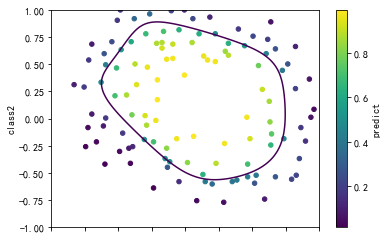

In [22]:
import tensorflow as tf
from tensorflow.contrib import slim

tf.reset_default_graph()
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])

with tf.variable_scope('network'):
    #增加了sigmoid为激活函数的隐藏层
    y_hidden = slim.fully_connected(inputs=x_placeholder,
                                     num_outputs=10,
                                     activation_fn=tf.nn.sigmoid,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer)
    y_predict = slim.fully_connected(inputs=y_hidden,
                                     num_outputs=1,
                                     activation_fn=None,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer)
loss = slim.losses.sigmoid_cross_entropy(logits=y_predict,multi_class_labels=y_placeholder)
train = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #####################################################
    # 通过定义一个临时变量，用来监控测试集上loss的变化，当
    # loss不再减小时，停止训练。
    tmp = float('inf')
    #####################################################
    for i in range(100000):
        if i%1000==0:
            _ = sess.run(loss,feed_dict={x_placeholder:x_test,y_placeholder:y_test})
            #####################################################
            if tmp<_:break
            tmp=_
            #####################################################
            print(_)
        sess.run(train,feed_dict={x_placeholder:x_train,y_placeholder:y_train})
    _y_predict = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder:x_data,y_placeholder:y_data})
    x = np.linspace(-1,1,101)
    y = np.linspace(-1,1,101)
    X,Y = np.meshgrid(x,y)
    Z = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder: np.hstack([X.flatten()[:,None],Y.flatten()[:,None]])})
print('finish train')

df['predict']=_y_predict
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')
plt.contour(X,Y,Z.reshape([101,101]),0.5)
plt.xlim(-1,1)
plt.ylim(-1,1)

1.7666477
1.0974907
0.79573274
0.7229387
0.70771897
0.7033955
0.7012843
0.69954187
0.6978175
0.69599795
0.6939398
0.69143444
0.68826336
0.6842845
0.6794184
0.6735848
0.6667021
0.6587679
0.649987
0.6408434
0.63198555
0.62398577
0.61716783
0.61157715
0.60699415
0.6028858
0.59844893
0.5931085
0.58649945
0.5779239
0.5667274
0.55325437
0.538905
0.5252481
0.5132442
0.50310653
0.49464786
0.48745155
0.48084375
0.47504357
0.47094816
0.46851206
0.46709013
0.46604612
0.465186
0.4646383
0.46432632
0.46412107
0.46437523
0.46594653
0.46915329
0.47292104
0.4758243
0.47776258
0.47957495
0.48174477
0.48431143
0.48721075
Early stopping is trigger at step: 11400 loss:0.487210750579834
INFO:tensorflow:Restoring parameters from early_stoping/checkpoint.ckpt
finish train


(-1, 1)

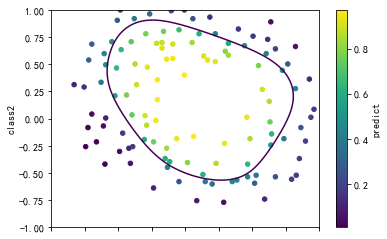

In [18]:
import tensorflow as tf
from tensorflow.contrib import slim

tf.reset_default_graph()
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])

with tf.variable_scope('network'):
    #增加了sigmoid为激活函数的隐藏层
    y_hidden = slim.fully_connected(inputs=x_placeholder,
                                     num_outputs=10,
                                     activation_fn=tf.nn.sigmoid,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer)
    y_predict = slim.fully_connected(inputs=y_hidden,
                                     num_outputs=1,
                                     activation_fn=None,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer)
loss = slim.losses.sigmoid_cross_entropy(logits=y_predict,multi_class_labels=y_placeholder)
train = tf.train.AdamOptimizer().minimize(loss)
##############################################################
best_loss = float('inf')
saver = tf.train.Saver()
early_stopping_step=2000
##############################################################

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100000):
        ######################################################################
        sess.run(train,feed_dict={x_placeholder:x_train,y_placeholder:y_train})
        if i%200==0:
            loss_value = sess.run(loss,feed_dict={x_placeholder:x_test,y_placeholder:y_test})
            if (loss_value < best_loss):
                stopping_step = 0
                best_loss = loss_value
                saver.save(sess,'early_stoping/checkpoint.ckpt')
            else:
                stopping_step += 200
            if stopping_step >= early_stopping_step:
                print("Early stopping is trigger at step: {} loss:{}".format(i,loss_value))
                saver.restore(sess,'early_stoping/checkpoint.ckpt')
                break
        ########################################################################
        
        
    _y_predict = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder:x_data,y_placeholder:y_data})
    x = np.linspace(-1,1,101)
    y = np.linspace(-1,1,101)
    X,Y = np.meshgrid(x,y)
    Z = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder: np.hstack([X.flatten()[:,None],Y.flatten()[:,None]])})
print('finish train')

df['predict']=_y_predict
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')
plt.contour(X,Y,Z.reshape([101,101]),0.5)
plt.xlim(-1,1)
plt.ylim(-1,1)

### 加入正则化项

1.9574324
0.49430093
0.4615253
0.45184383
0.44693694
0.44671717
0.4464599
0.44659802
0.44665545
0.44685894
finish train


(-1, 1)

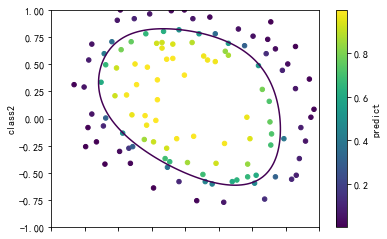

In [80]:
import tensorflow as tf
from tensorflow.contrib import slim

tf.reset_default_graph()
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])

with tf.variable_scope('network'):
    #增加了sigmoid为激活函数的隐藏层
    y_hidden = slim.fully_connected(inputs=x_placeholder,
                                     num_outputs=10,
                                     activation_fn=tf.nn.sigmoid,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer,
                                    #####################################################
                                    # 通过增加l1正则化项（l1正则化项是各项可训练参数的绝对
                                    # 值之和），使得一部分作用较小的神经元的权重为0，从而达
                                    # 到简化神经网络的作用，在添加了正则化项之后，还需要在
                                    # loss处（如下所示），将正则化项加入进去。
                                     weights_regularizer=slim.l1_regularizer(0.001),
#                                      biases_regularizer=slim.l1_regularizer(0.001),
                                     scope='hidden_layer')
                                    #####################################################
    y_predict = slim.fully_connected(inputs=y_hidden,
                                     num_outputs=1,
                                     activation_fn=None,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer)
loss = slim.losses.sigmoid_cross_entropy(logits=y_predict,multi_class_labels=y_placeholder)
#####################################################
loss += sum(tf.get_collection('regularization_losses'))
#####################################################
train = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(100000):
        if i%10000==0:
            _ = sess.run(loss,feed_dict={x_placeholder:x_test,y_placeholder:y_test})
            print(_)
        sess.run(train,feed_dict={x_placeholder:x_train,y_placeholder:y_train})
    _y_predict = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder:x_data,y_placeholder:y_data})
    x = np.linspace(-1,1,101)
    y = np.linspace(-1,1,101)
    X,Y = np.meshgrid(x,y)
    Z = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder: np.hstack([X.flatten()[:,None],Y.flatten()[:,None]])})
print('finish train')

df['predict']=_y_predict
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')
plt.contour(X,Y,Z.reshape([101,101]),0.5)
plt.xlim(-1,1)
plt.ylim(-1,1)

[0.8361516]
[0.6122475]
[0.51862377]
[0.479687]
[0.46127415]
[0.45173717]
[0.44646496]
[0.44350407]
[0.44154915]
[0.44036916]
finish train


(-1, 1)

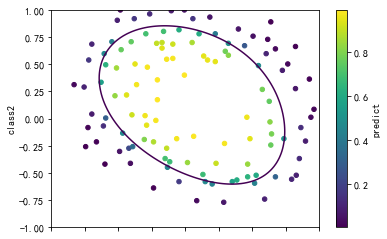

In [73]:
import tensorflow as tf
from tensorflow.contrib import slim

tf.reset_default_graph()
x_placeholder = tf.placeholder(tf.float32,shape=[None,2])
y_placeholder = tf.placeholder(tf.float32,shape=[None,1])

with tf.variable_scope('network'):
    #增加了sigmoid为激活函数的隐藏层
    y_hidden = slim.fully_connected(inputs=x_placeholder,
                                     num_outputs=10,
                                     activation_fn=tf.nn.sigmoid,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer,
                                    #####################################################
                                     weights_regularizer=slim.l2_regularizer(0.01),scope='hidden_layer')
                                    #####################################################
    y_predict = slim.fully_connected(inputs=y_hidden,
                                     num_outputs=1,
                                     activation_fn=None,
                                     weights_initializer=tf.random_normal_initializer,
                                     biases_initializer=tf.random_normal_initializer)
loss = slim.losses.sigmoid_cross_entropy(logits=y_predict,multi_class_labels=y_placeholder)
#####################################################
loss += sum(tf.get_collection('regularization_losses'))
#####################################################
train = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(100000):
        if i%10000==0:
            _ = sess.run(loss,feed_dict={x_placeholder:x_test,y_placeholder:y_test})
            print(_)
        sess.run(train,feed_dict={x_placeholder:x_train,y_placeholder:y_train})
    _y_predict = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder:x_data,y_placeholder:y_data})
    x = np.linspace(-1,1,101)
    y = np.linspace(-1,1,101)
    X,Y = np.meshgrid(x,y)
    Z = sess.run(tf.nn.sigmoid(y_predict),feed_dict={x_placeholder: np.hstack([X.flatten()[:,None],Y.flatten()[:,None]])})
print('finish train')

df['predict']=_y_predict
df.plot(kind='scatter',x='class1',y='class2',c='predict',cmap='viridis')
plt.contour(X,Y,Z.reshape([101,101]),0.5)
plt.xlim(-1,1)
plt.ylim(-1,1)